# Zeropoints Comparison

## Environment: anaconda-2.7 

In [1]:
import sys
print sys.executable
# Hack!, this avoids messing with NERSC's config file for jupyter hub
sys.path.append('/global/homes/k/kaylanb/repos/astrometry.net')
sys.path.append('/global/homes/k/kaylanb/repos/jupyter_photutils')
sys.path.append('/global/homes/k/kaylanb/repos')
sys.path.append('/global/homes/k/kaylanb/repos/tractor')
print sys.path

/anaconda2/bin/python
['', '/anaconda2/lib/python27.zip', '/anaconda2/lib/python2.7', '/anaconda2/lib/python2.7/plat-linux2', '/anaconda2/lib/python2.7/lib-tk', '/anaconda2/lib/python2.7/lib-old', '/anaconda2/lib/python2.7/lib-dynload', '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages', '/anaconda2/lib/python2.7/site-packages', '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/global/u2/k/kaylanb/.ipython', '/global/homes/k/kaylanb/repos/astrometry.net', '/global/homes/k/kaylanb/repos/jupyter_photutils', '/global/homes/k/kaylanb/repos', '/global/homes/k/kaylanb/repos/tractor']


## Need more packages?

In [46]:
# Easy if pip, conda installable
# !/anaconda2/bin/pip install --target=d:/global/homes/k/kaylanb/repos/jupyter_photutils photutils
!/anaconda2/bin/pip install --target=/global/homes/k/kaylanb/repos/jupyter_photutils --no-deps photutils
# !/anaconda2/bin/conda install photutils

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Main()

Run [legacy-zeropoints-qa.py](https://github.com/legacysurvey/legacypipe/blob/57fd01b80ed6af65543a1177798977da45975f3a/py/legacyccds/legacy-zeropoints.py) like this `"python legacy-zeropoints-qa.py"` to analyze everything. 

See below to walk through it step by step.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import fitsio
import glob
import os
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from photutils import (CircularAperture, CircularAnnulus,
                               aperture_photometry, daofind)

from astrometry.util.fits import fits_table, merge_tables

# Noise in Decals Sim

In [26]:
stamp,stamp_wnoise,ivar,ivar_wnoise={},{},{},{}
for typ in ['star','elg']:
    print typ
    stamp[typ]= np.load('../decals_sim/%s_noise/stamp.npy' % typ)
    stamp_wnoise[typ]= np.load('../decals_sim/%s_noise/stamp_wnoise.npy' % typ)
    ivar[typ]= np.load('../decals_sim/%s_noise/ivarstamp.npy' % typ)
    ivar_wnoise[typ]= np.load('../decals_sim/%s_noise/ivarstamp_wnoise.npy' % typ)

star
elg


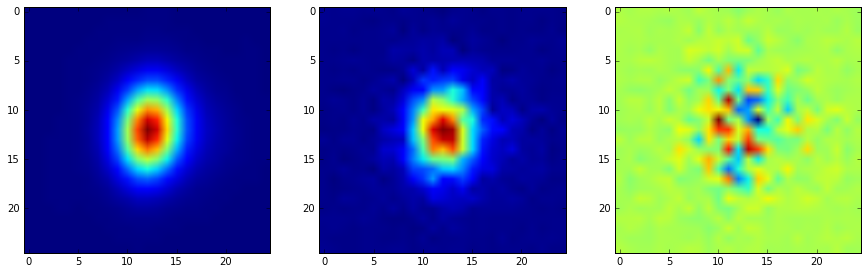

In [33]:
key='elg'
fig,ax= plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(stamp[key][25:50,25:50])
ax[1].imshow(stamp_wnoise[key][25:50,25:50])
ax[2].imshow(stamp_wnoise[key][25:50,25:50]-stamp[key][25:50,25:50])




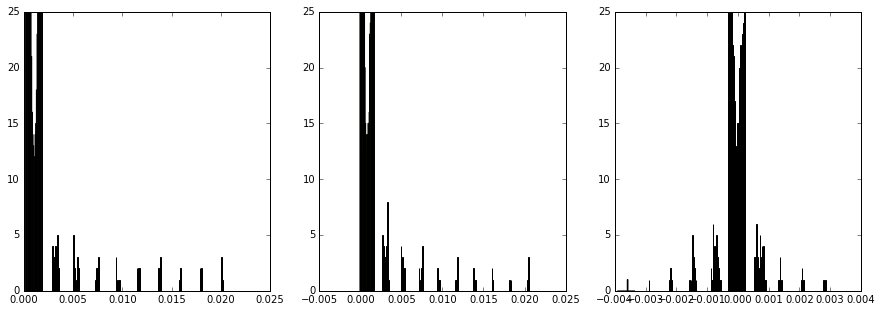

In [36]:
key='elg'
fig,ax= plt.subplots(1,3,figsize=(15,5))
a=ax[0].hist(stamp[key][25:50,25:50])
a=ax[1].hist(stamp_wnoise[key][25:50,25:50])
a=ax[2].hist(stamp_wnoise[key][25:50,25:50]-stamp[key][25:50,25:50])

# Original zeropoints

comparing problematic
converted, now comparing


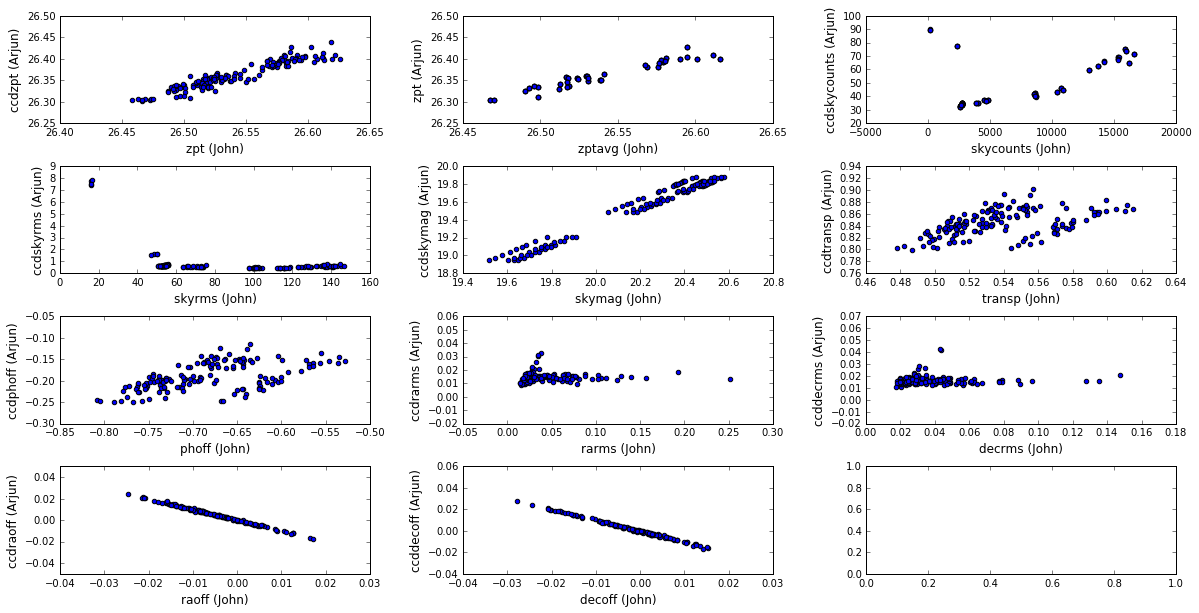

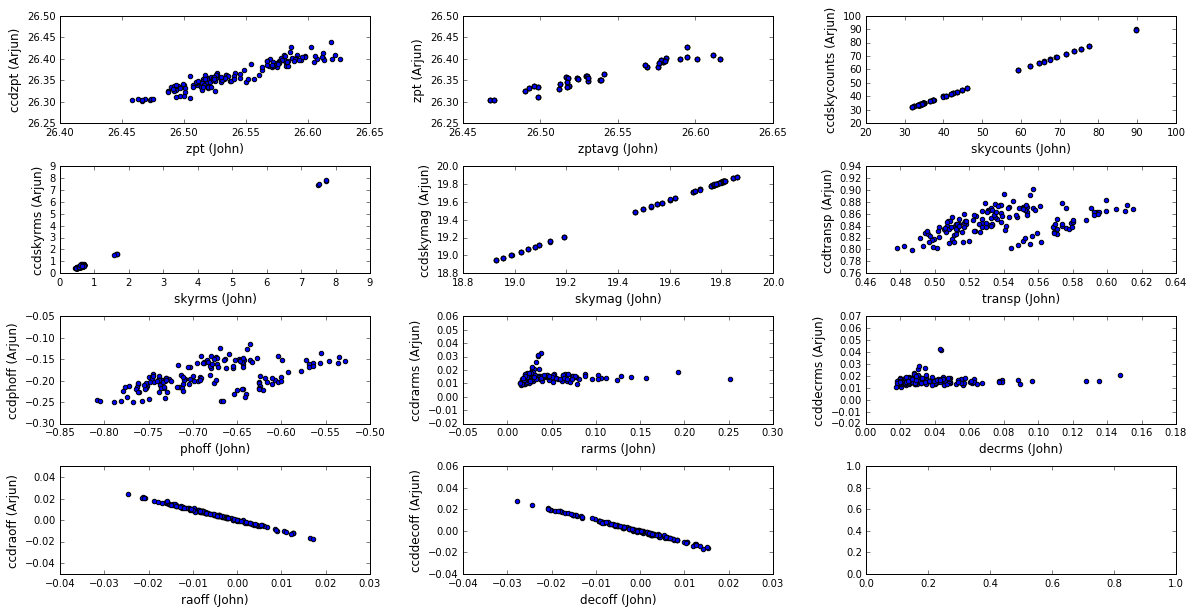

In [20]:
from translate import Translator,Converter

j_cat,a_cat= [],[]
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
fns=glob.glob(os.path.join(mydir,'original/originalzero*v2.fits'))
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(os.path.dirname(fn), 'arjun_'+os.path.basename(fn).replace('original',''))
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

t=Translator(j,a,verbose=False)
t.compare_problematic()

c=Converter(j,a)
# t.save(fn='test.pickle')

# Stars zeropoints

comparing problematic
converted, now comparing


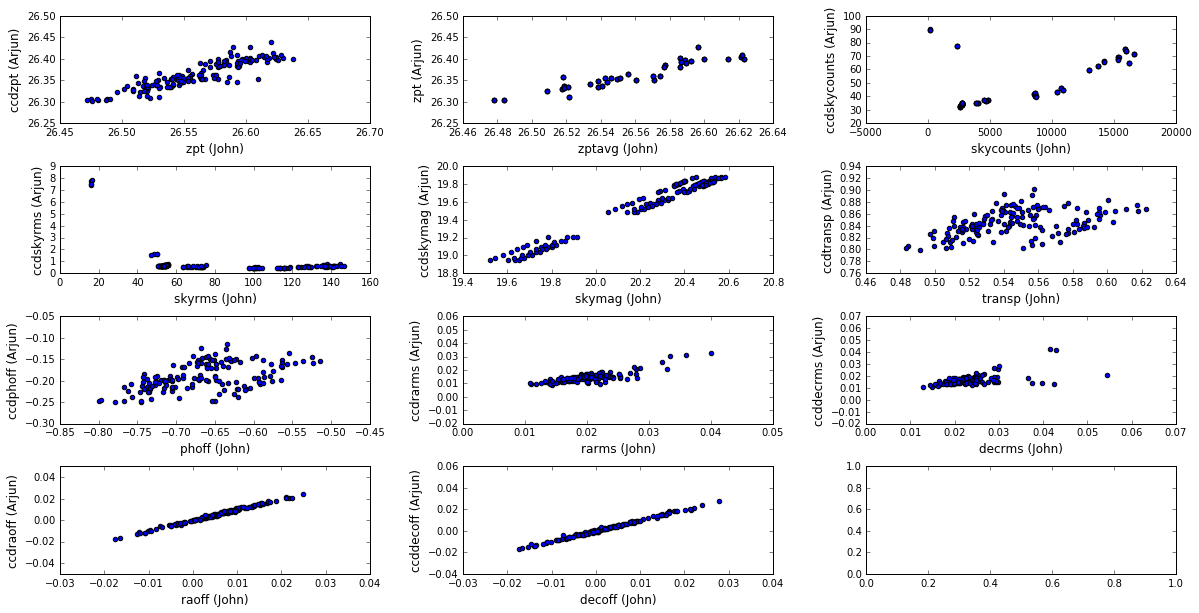

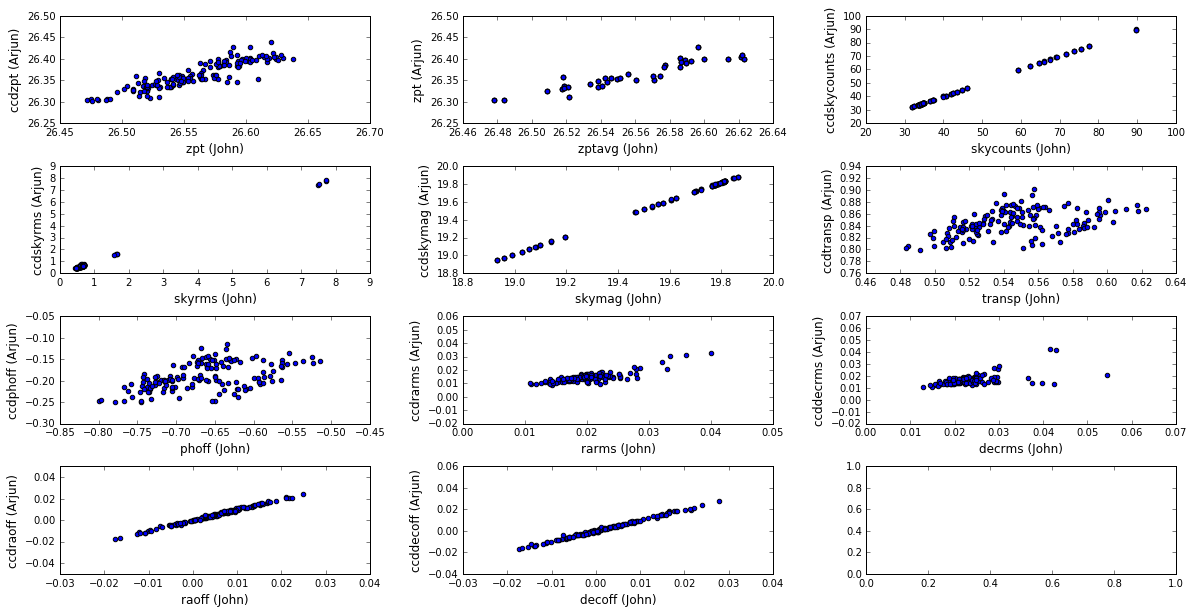

In [100]:
from translate import Translator,Converter

prefix='stars'
j_cat,a_cat= [],[]
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
fns=glob.glob(os.path.join(mydir,'%s/%szero*v2.fits' % (prefix,prefix)))
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(mydir,'original/',os.path.basename(fn).replace(prefix,'arjun_'))
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

t=Translator(j,a,verbose=False)
# t.compare_floats_ints()
t.compare_problematic()

c=Converter(j,a)
# t.save(fn='test.pickle')

# Gain zpts

comparing problematic
converted, now comparing


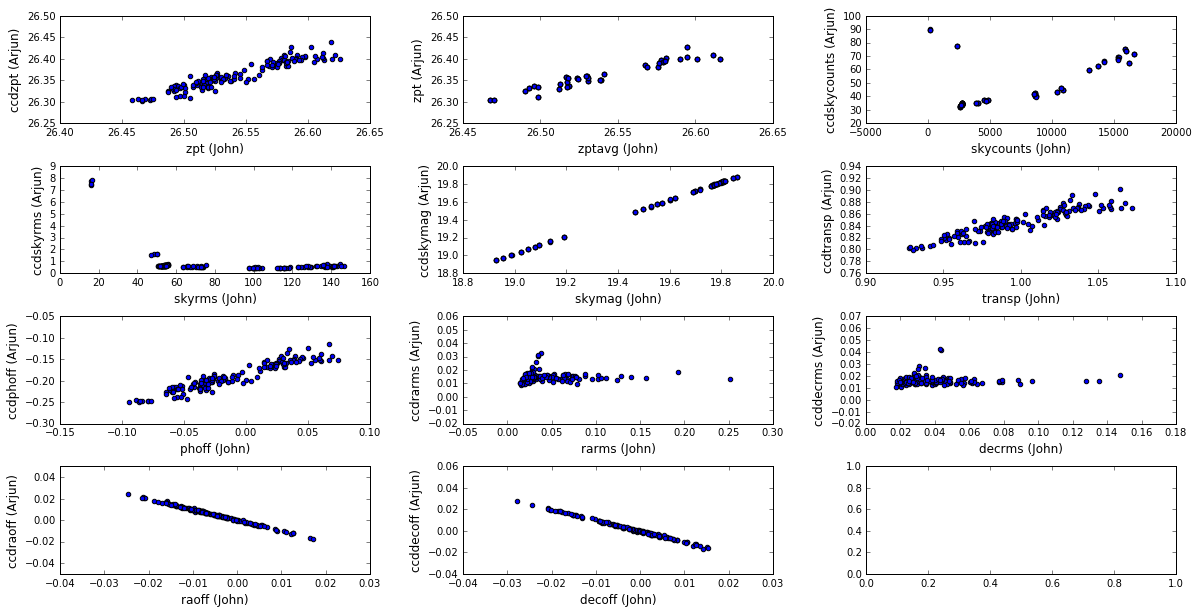

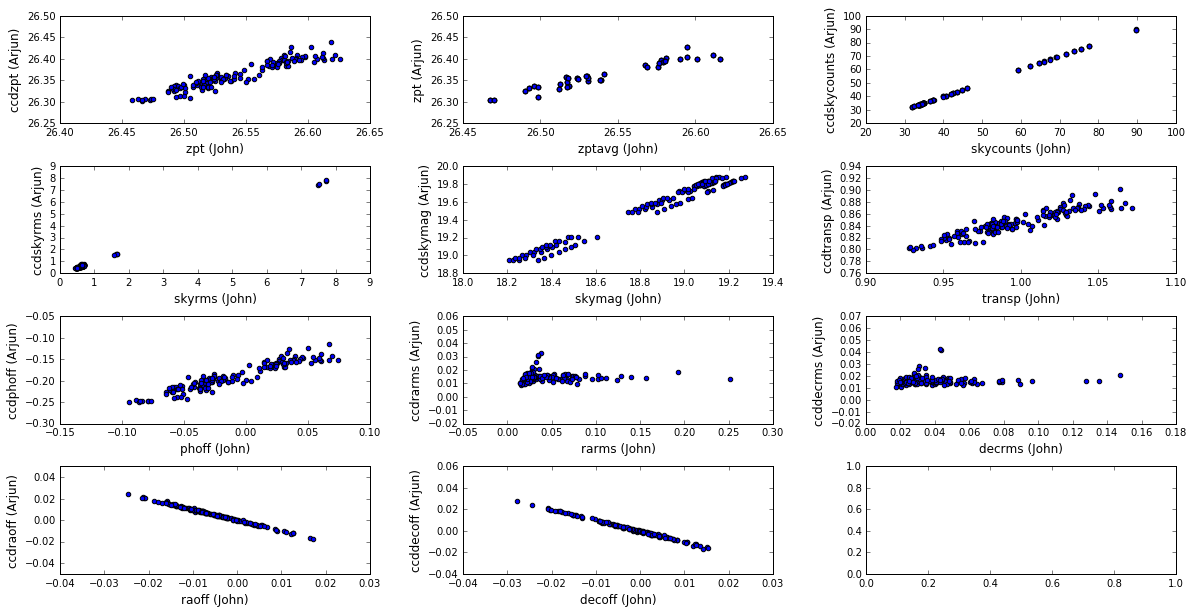

In [96]:
from translate import Translator,Converter

prefix='gain'
j_cat,a_cat= [],[]
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
fns=glob.glob(os.path.join(mydir,'%s/%szero*v2.fits' % (prefix,prefix)))
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(mydir,'original/',os.path.basename(fn).replace(prefix,'arjun_'))
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

t=Translator(j,a,verbose=False)
t.compare_problematic()

c=Converter(j,a)
# t.save(fn='test.pickle')

# Expt zpts

comparing problematic
converted, now comparing


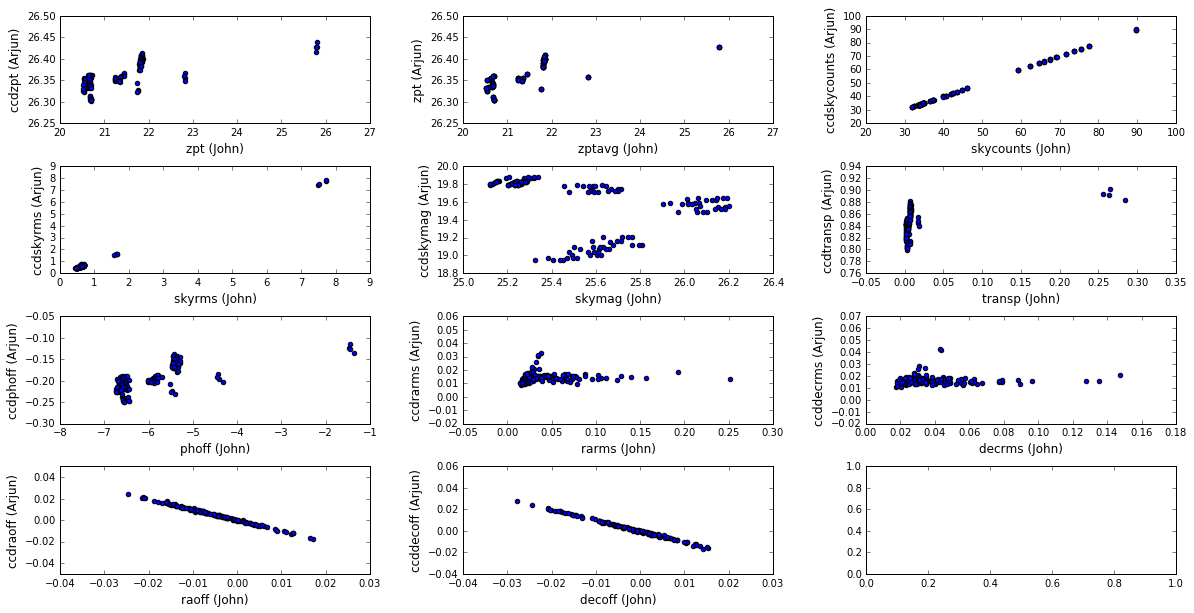

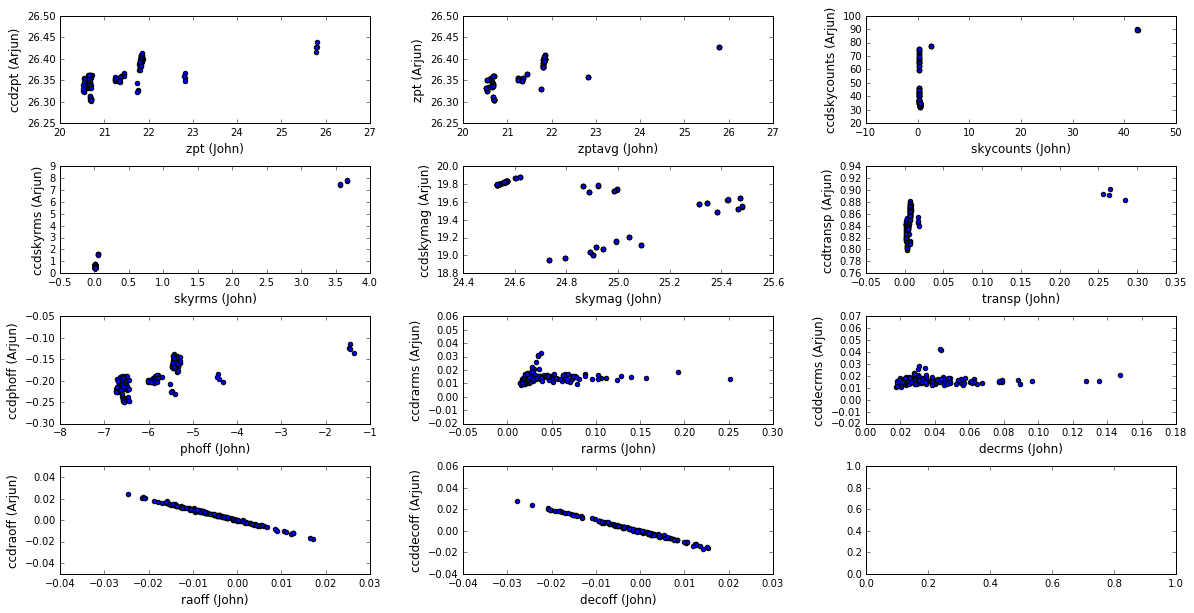

In [99]:
from translate import Translator,Converter

prefix='expt'
j_cat,a_cat= [],[]
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
fns=glob.glob(os.path.join(mydir,'%s/%szero*v2.fits' % (prefix,prefix)))
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(mydir,'original/',os.path.basename(fn).replace(prefix,'arjun_'))
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

t=Translator(j,a,verbose=False)
t.compare_problematic()

c=Converter(j,a)
# t.save(fn='test.pickle')

# Gain and texp zeropoints

comparing problematic
converted, now comparing


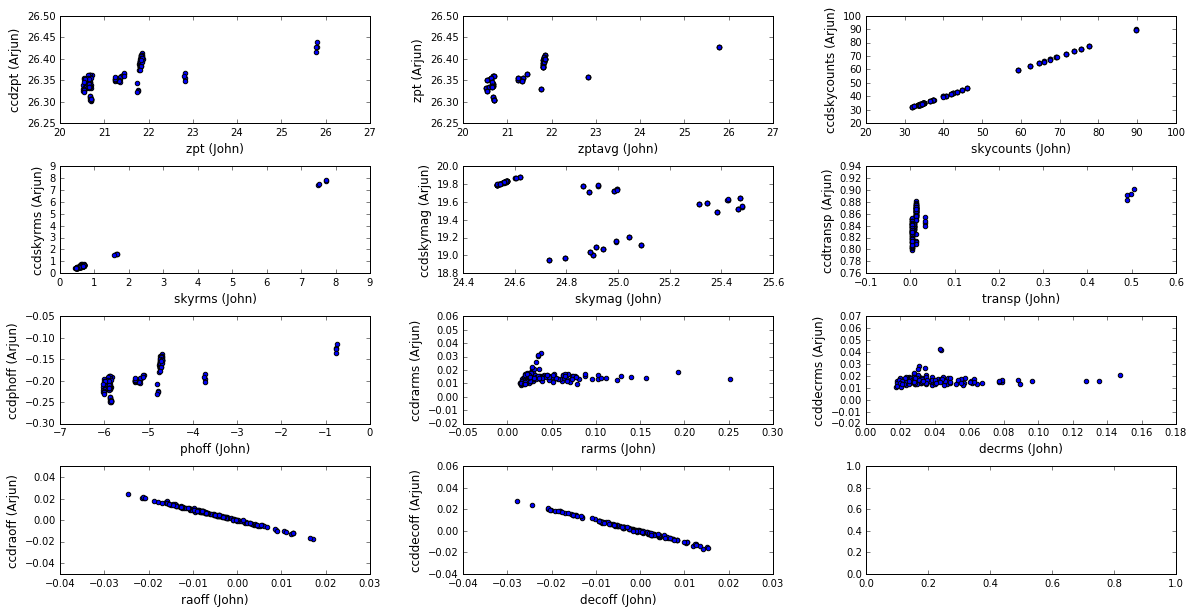

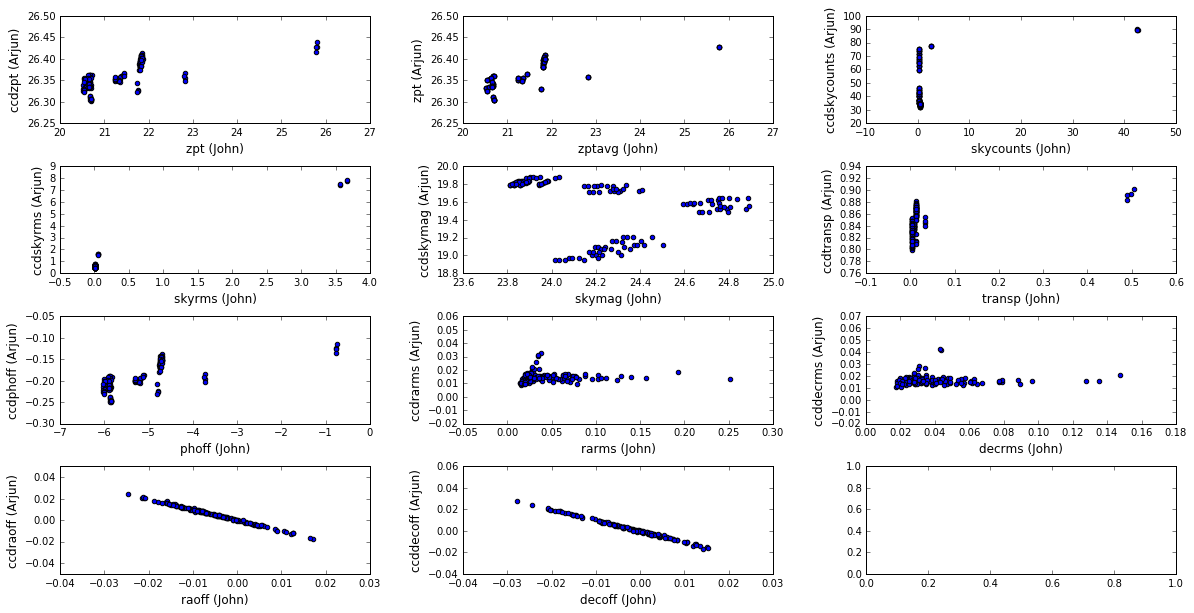

In [21]:
from translate import Translator,Converter

j_cat,a_cat= [],[]
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
fns=glob.glob(os.path.join(mydir,'gainexpt/gainexptzero*v2.fits'))
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(mydir,'original/',os.path.basename(fn).replace('gainexpt','arjun_'))
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

t=Translator(j,a,verbose=False)
t.compare_problematic()

c=Converter(j,a)
# t.save(fn='test.pickle')

# Comparing -stars.fits tables
legacy-zeropoints-stars.py


In [153]:
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
part='k4m_160203_015632_ooi_zd_v2'
j=fits_table(os.path.join(mydir,'stars3/','stars3zeropoint-'+part+'-stars.fits'))
a=fits_table(os.path.join(mydir,'original/','matches-'+part+'.fits'))

In [162]:
import theValidator.catalogues as cats

for key in ['ra','dec']: 
    a.set(key,a.get('ccd_%s' % key))
    j.set(key,j.get('ccd_%s' % key))
imatch,imiss,d2d= cats.Matcher().match_within(a,j)

Matched: 676/906 objects


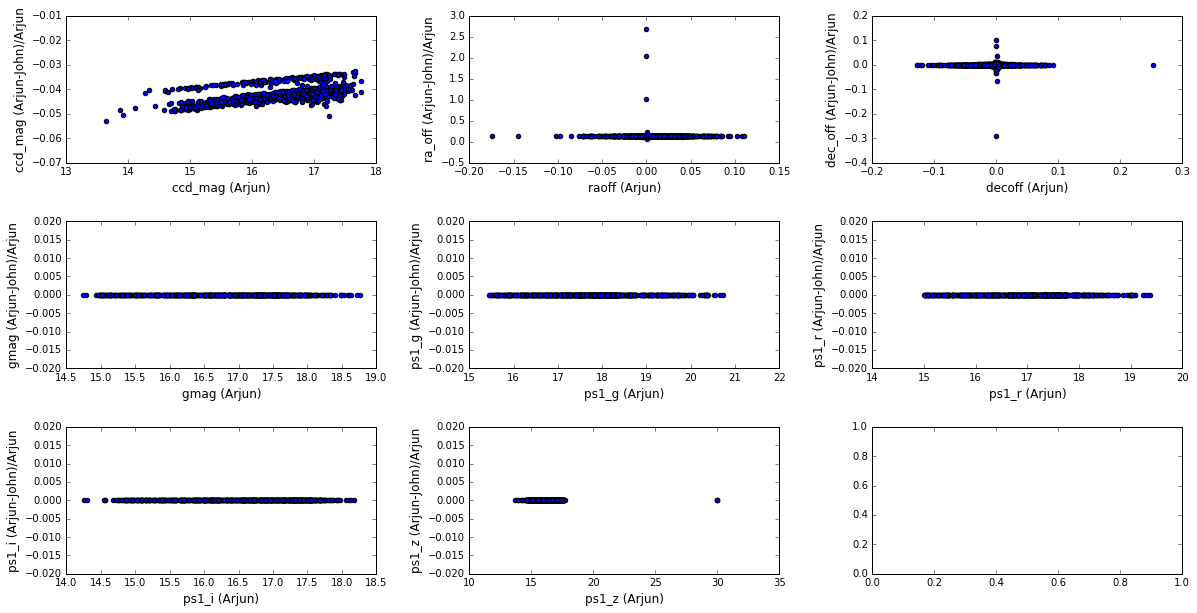

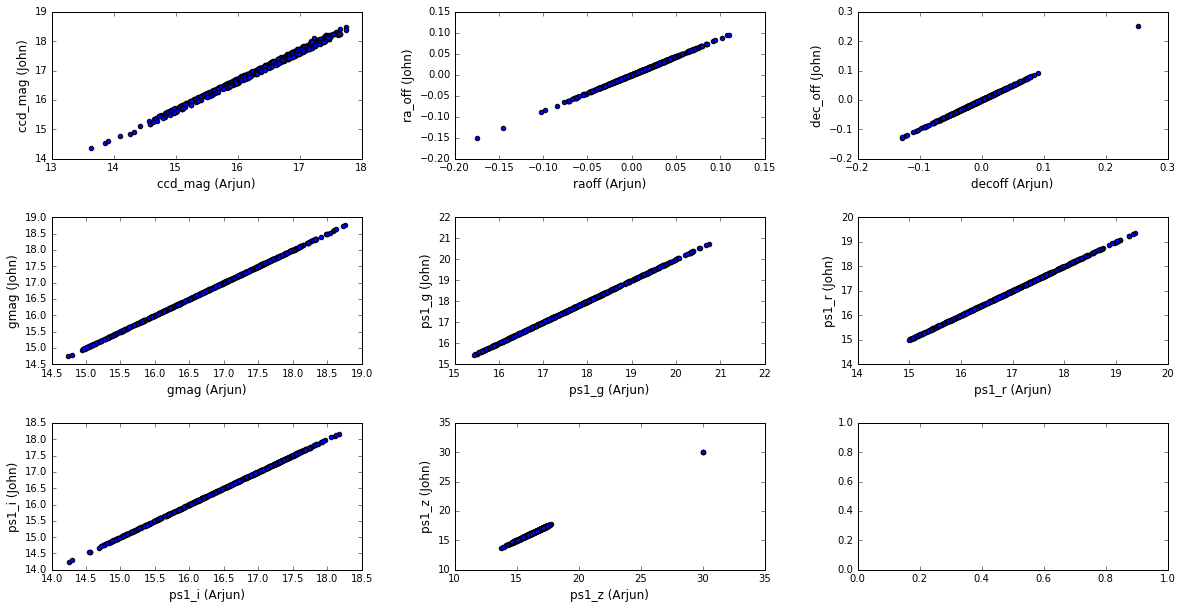

In [169]:
keys=['ccd_mag','ra_off','dec_off','gmag',\
     'ps1_g','ps1_r','ps1_i','ps1_z']
fig,axes= plt.subplots(3,3,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in keys:
    cnt+=1
    if key in ['ra_off','dec_off']:
        akey=key.replace('_','')
    else: 
        akey=key
    arjun= a.get(akey)[imatch['ref']]
    john= j.get(key)[imatch['obs']]
    ax[cnt].scatter(arjun,(arjun-john)/arjun)
    ylab=ax[cnt].set_ylabel('%s (Arjun-John)/Arjun' % key,fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % akey,fontsize='large')
##
fig,axes= plt.subplots(3,3,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in keys:
    cnt+=1
    if key in ['ra_off','dec_off']:
        akey=key.replace('_','')
    else: 
        akey=key
    arjun= a.get(akey)[imatch['ref']]
    john= j.get(key)[imatch['obs']]
    ax[cnt].scatter(arjun,john)
    ylab=ax[cnt].set_ylabel('%s (John)' % key,fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % akey,fontsize='large')

# Gain=1.8 and Comparing -stars.fits tables
legacy-zeropoints-stars-gain1.8.py


In [172]:
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
part='k4m_160203_015632_ooi_zd_v2'
j=fits_table(os.path.join(mydir,'stars-gain1.8/','stars-gain1.8zeropoint-'+part+'-stars.fits'))
a=fits_table(os.path.join(mydir,'original/','matches-'+part+'.fits'))

In [173]:
import theValidator.catalogues as cats

for key in ['ra','dec']: 
    a.set(key,a.get('ccd_%s' % key))
    j.set(key,j.get('ccd_%s' % key))
imatch,imiss,d2d= cats.Matcher().match_within(a,j)

Matched: 676/906 objects


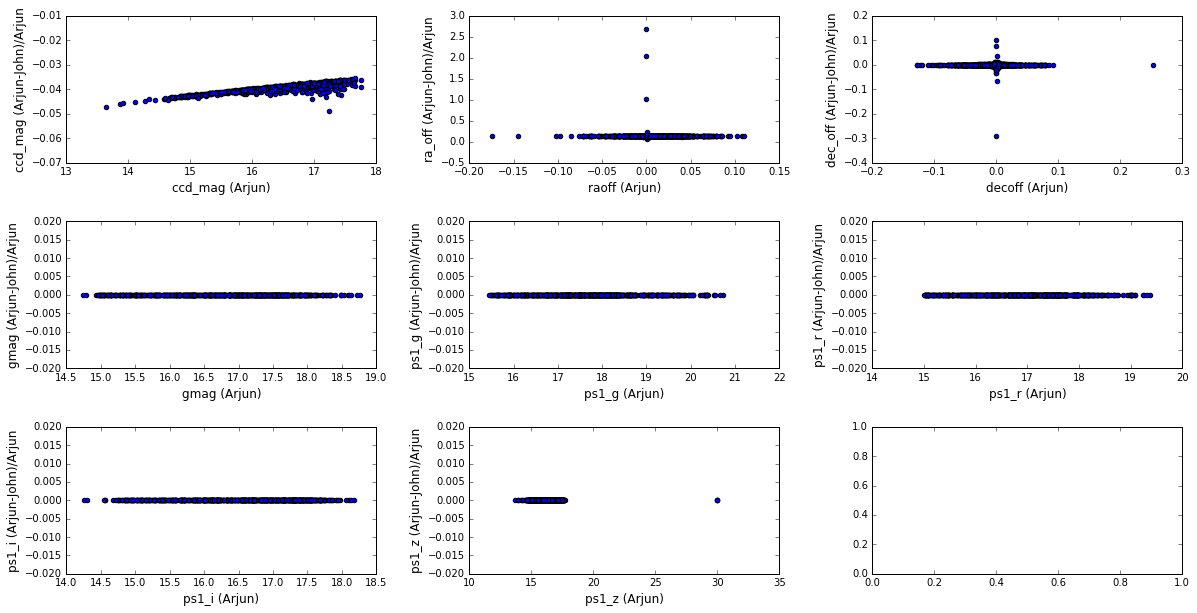

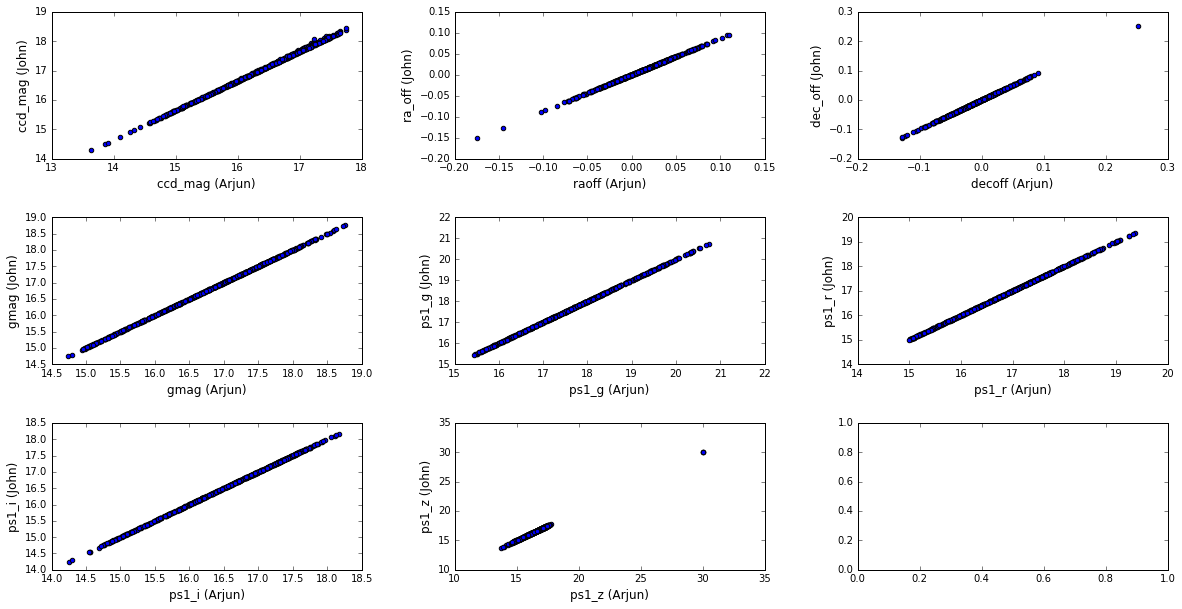

In [174]:
keys=['ccd_mag','ra_off','dec_off','gmag',\
     'ps1_g','ps1_r','ps1_i','ps1_z']
fig,axes= plt.subplots(3,3,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in keys:
    cnt+=1
    if key in ['ra_off','dec_off']:
        akey=key.replace('_','')
    else: 
        akey=key
    arjun= a.get(akey)[imatch['ref']]
    john= j.get(key)[imatch['obs']]
    ax[cnt].scatter(arjun,(arjun-john)/arjun)
    ylab=ax[cnt].set_ylabel('%s (Arjun-John)/Arjun' % key,fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % akey,fontsize='large')
##
fig,axes= plt.subplots(3,3,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in keys:
    cnt+=1
    if key in ['ra_off','dec_off']:
        akey=key.replace('_','')
    else: 
        akey=key
    arjun= a.get(akey)[imatch['ref']]
    john= j.get(key)[imatch['obs']]
    ax[cnt].scatter(arjun,john)
    ylab=ax[cnt].set_ylabel('%s (John)' % key,fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % akey,fontsize='large')

# noCorr w/Gain=1.8 
legacy-zeropoints-stars-gain1.8noCorr.py


In [30]:
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
# part='k4m_160203_015632_ooi_zd_v2'
part='k4m_160203_064552_ooi_zd_v2'
j_stars=fits_table(os.path.join(mydir,'stars-gain1.8noCorr/','stars-gain1.8noCorrzeropoint-'+part+'-stars.fits'))
a_stars=fits_table(os.path.join(mydir,'original/','matches-'+part+'.fits'))
j=fits_table(os.path.join(mydir,'stars-gain1.8noCorr/','stars-gain1.8noCorrzeropoint-'+part+'.fits'))
j_mzls_color= fits_table(os.path.join(mydir,'stars-gain1.8noCorr/','stars-gain1.8noCorrmzlscolorzeropoint-'+part+'.fits'))
a=fits_table(os.path.join(mydir,'original/','arjun_zeropoint-'+part+'.fits'))

import theValidator.catalogues as cats

for key in ['ra','dec']: 
    a_stars.set(key,a_stars.get('ccd_%s' % key))
#     j.set(key,j.get('ccd_%s' % key))
imatch,imiss,d2d= cats.Matcher().match_within(a_stars,j_stars)

from translate import Translator,Converter
t=Translator(j,a,verbose=False)
# t.compare()
# t.compare_problematic()

Matched: 846/1288 objects


In [4]:
a.get('ccdzpt'),j.get('zpt'),a.get('zpt'),j.get('zptavg')

(array([ 26.39992142,  26.40001488,  26.40084267,  26.39725494], dtype=float32),
 array([ 26.40281105,  26.39949417,  26.40331841,  26.40052605], dtype=float32),
 array([ 26.39950752,  26.39950752,  26.39950752,  26.39950752], dtype=float32),
 array([ 26.40166855,  26.40166855,  26.40166855,  26.40166855], dtype=float32))

(array([ 26.40281105,  26.39949417,  26.40331841,  26.40052605], dtype=float32), array([ 26.39992142,  26.40001488,  26.40084267,  26.39725494], dtype=float32))
(array([ 26.39827538,  26.39281654,  26.39694786,  26.39619446], dtype=float32), array([ 26.39992142,  26.40001488,  26.40084267,  26.39725494], dtype=float32))


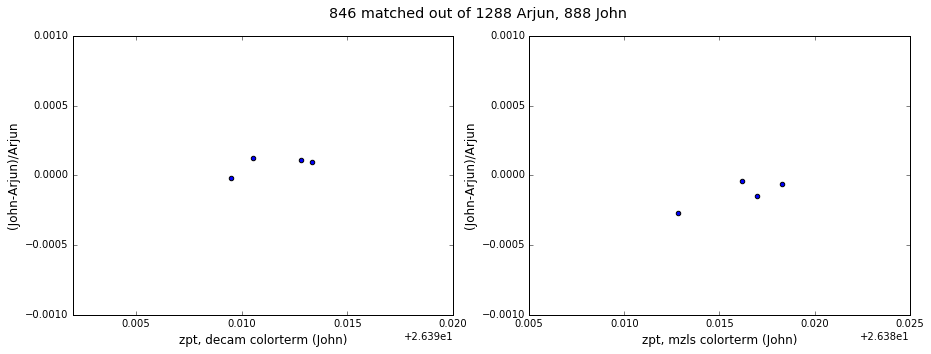

In [33]:
# from scipy.stats import sigmaclip
# dmagall = j_stars.get('ps1_mag')[imatch['obs']] - j_stars.get('apmag')[imatch['obs']]
# zp0=26.552
# kext=0.06
# myzpt=dict(w_decam=0,w_mzls=0)
# # Decam color
# dmag, _, _ = sigmaclip(dmagall, low=2.5, high=2.5)
# dmagmed = np.median(dmag)
# zptmed = zp0 + dmagmed
# myzpt['w_decam']= zptmed
# # Mzls color
# dmagall=dmagall- j_stars.get('decam_colorterm')[imatch['obs']] -j_stars.get('mzls_colorterm')[imatch['obs']]
# dmag, _, _ = sigmaclip(dmagall, low=2.5, high=2.5)
# dmagmed = np.median(dmag)
# zptmed = zp0 + dmagmed
# myzpt['w_mzls']= zptmed


fig,ax= plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(hspace=0,wspace=0.2)
for cnt in range(2):
    arjun= a.get('ccdzpt')
    if cnt == 0:
#         ax[cnt].set_ylim(-0.01,0.01)
        john= j.get('zpt')
        xlab=ax[cnt].set_xlabel('zpt, decam colorterm (John)',fontsize='large')
    else:
        john= j_mzls_color.get('zpt')
        xlab=ax[cnt].set_xlabel('zpt, mzls colorterm (John)',fontsize='large')
    ylab=ax[cnt].set_ylabel('(John-Arjun)/Arjun',fontsize='large')
    y= (john-arjun)/arjun
    print(john,arjun)
    ax[cnt].scatter(john,y)
    ax[cnt].set_ylim(-0.001,0.001)
ti=plt.suptitle('%d matched out of %d Arjun, %d John' % \
                (imatch['ref'].size,len(a_stars),len(j_stars)), fontsize='x-large')
plt.savefig("zptdiff.png",\
            bbox_extra_artists=[ti,xlab,ylab], bbox_inches='tight',dpi=150)

# BASS comparison


In [114]:
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/bok'
suffix='ksb_160211_123455_ooi_g_v1.fits'
a=fits_table(os.path.join(mydir,'arjun','zeropoint-'+suffix))
a_stars=fits_table(os.path.join(mydir,'arjun','matches-'+suffix))
j=fits_table(os.path.join(mydir,'kay1/','blahzeropoint-'+suffix))
j_stars=fits_table(os.path.join(mydir,'kay1/','blahzeropoint-'+suffix.replace('.fits','-stars.fits')))

import theValidator.catalogues as cats
for key in ['ra','dec']: 
    a_stars.set(key,a_stars.get('ccd_%s' % key))
#     j.set(key,j.get('ccd_%s' % key))
imatch,imiss,d2d= cats.Matcher().match_within(a_stars,j_stars)

Matched: 762/1620 objects


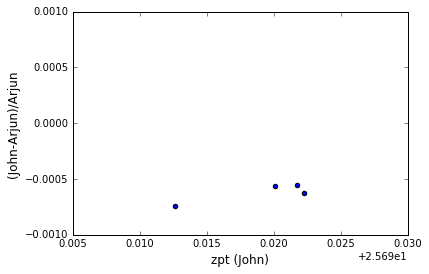

In [115]:
arjun= a.get('ccdzpt')
john= j.get('zpt')
y= (john-arjun)/arjun
plt.scatter(john,y)
plt.ylim(-0.001,0.001)
xlab=plt.xlabel('zpt (John)',fontsize='large')
ylab=plt.ylabel('(John-Arjun)/Arjun',fontsize='large')

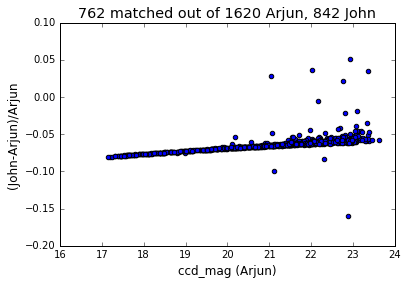

In [116]:
arjun= a_stars.get('ccd_mag')[imatch['ref']]
john= j_stars.get('apmag')[imatch['obs']]
y= (john-arjun)/arjun
plt.scatter(arjun,y)
# plt.ylim(-0.01,0.01)
xlab=plt.xlabel('%s (Arjun)' % 'ccd_mag',fontsize='large')
ylab=plt.ylabel('(John-Arjun)/Arjun',fontsize='large')
ti=plt.title('%d matched out of %d Arjun, %d John' % \
                (imatch['ref'].size,len(a_stars),len(j_stars)), fontsize='x-large')


In [112]:
j.get('airmass')

array([ 1.,  1.,  1.,  1.], dtype=float32)

In [119]:
from scipy.stats import sigmaclip
ps1mag= j_stars.get('ps1_mag')-j_stars.get('90prime_colorterm')+j_stars.get('decam_colorterm')
mskeep = np.where((j_stars.get('ps1_gicolor') > 0.4) * (j_stars.get('ps1_gicolor') < 2.7))[0]
dmagall = ps1mag[mskeep] - j_stars.get('apmag')[mskeep]
dmag, _, _ = sigmaclip(dmagall, low=3, high=3.0)
dmagmed = np.median(dmag)
kext=0.17
airmass=j.get('airmass')[0]
transp = 10.**(-0.4 * (-dmagmed - kext * (airmass - 1.0)))
print transp

1.16871081188


In [120]:


a_stars.get('ccd_mag')[imatch['ref']][:4],ps1mag[imatch['obs']][:4], j_stars.get('apmag')[imatch['obs']][:4]

(array([ 21.69580269,  19.62255859,  21.26961327,  19.58806229], dtype=float32),
 array([ 20.5760231 ,  18.42164993,  20.80606079,  18.4051609 ], dtype=float32),
 array([ 20.41258621,  18.24415779,  19.88523293,  18.20581245], dtype=float32))

In [110]:
a.get('ccdzpt'),j.get('zpt'),a.get('ccdtransp'),j.get('transp'),10**0.01

(array([ 25.72593498,  25.72823143,  25.72176743,  25.72459602], dtype=float32),
 array([ 25.71177292,  25.71225166,  25.70266724,  25.71006966], dtype=float32),
 array([ 0.32989332,  0.33059204,  0.32862946,  0.32948723], dtype=float32),
 array([ 1.16067195,  1.16118276,  1.15097749,  1.1588515 ], dtype=float32),
 1.023292992280754)

----
String comparison, John --> Arjun
----
propid:2015A-0801 --> propid:2015A-0801
image_filename:ksb_160211_123455_ooi_g_v1.fits.fz --> filename:ksb_160211_123455_ooi_g_v1.fits
ccdname:CCD1 --> ccdname:ccd1
object:09162 --> object:09162   
ha:-00:01:14 --> ha:-00:01:14 
date_obs:2016-02-11 --> date_obs:2016-02-11
ut:12:34:55.643 --> ut:12:34:55.643
filter:g --> filter:g


translate.py:137: RuntimeWarning: divide by zero encountered in divide
  ax[cnt].scatter(arjun,(john-arjun)/arjun)


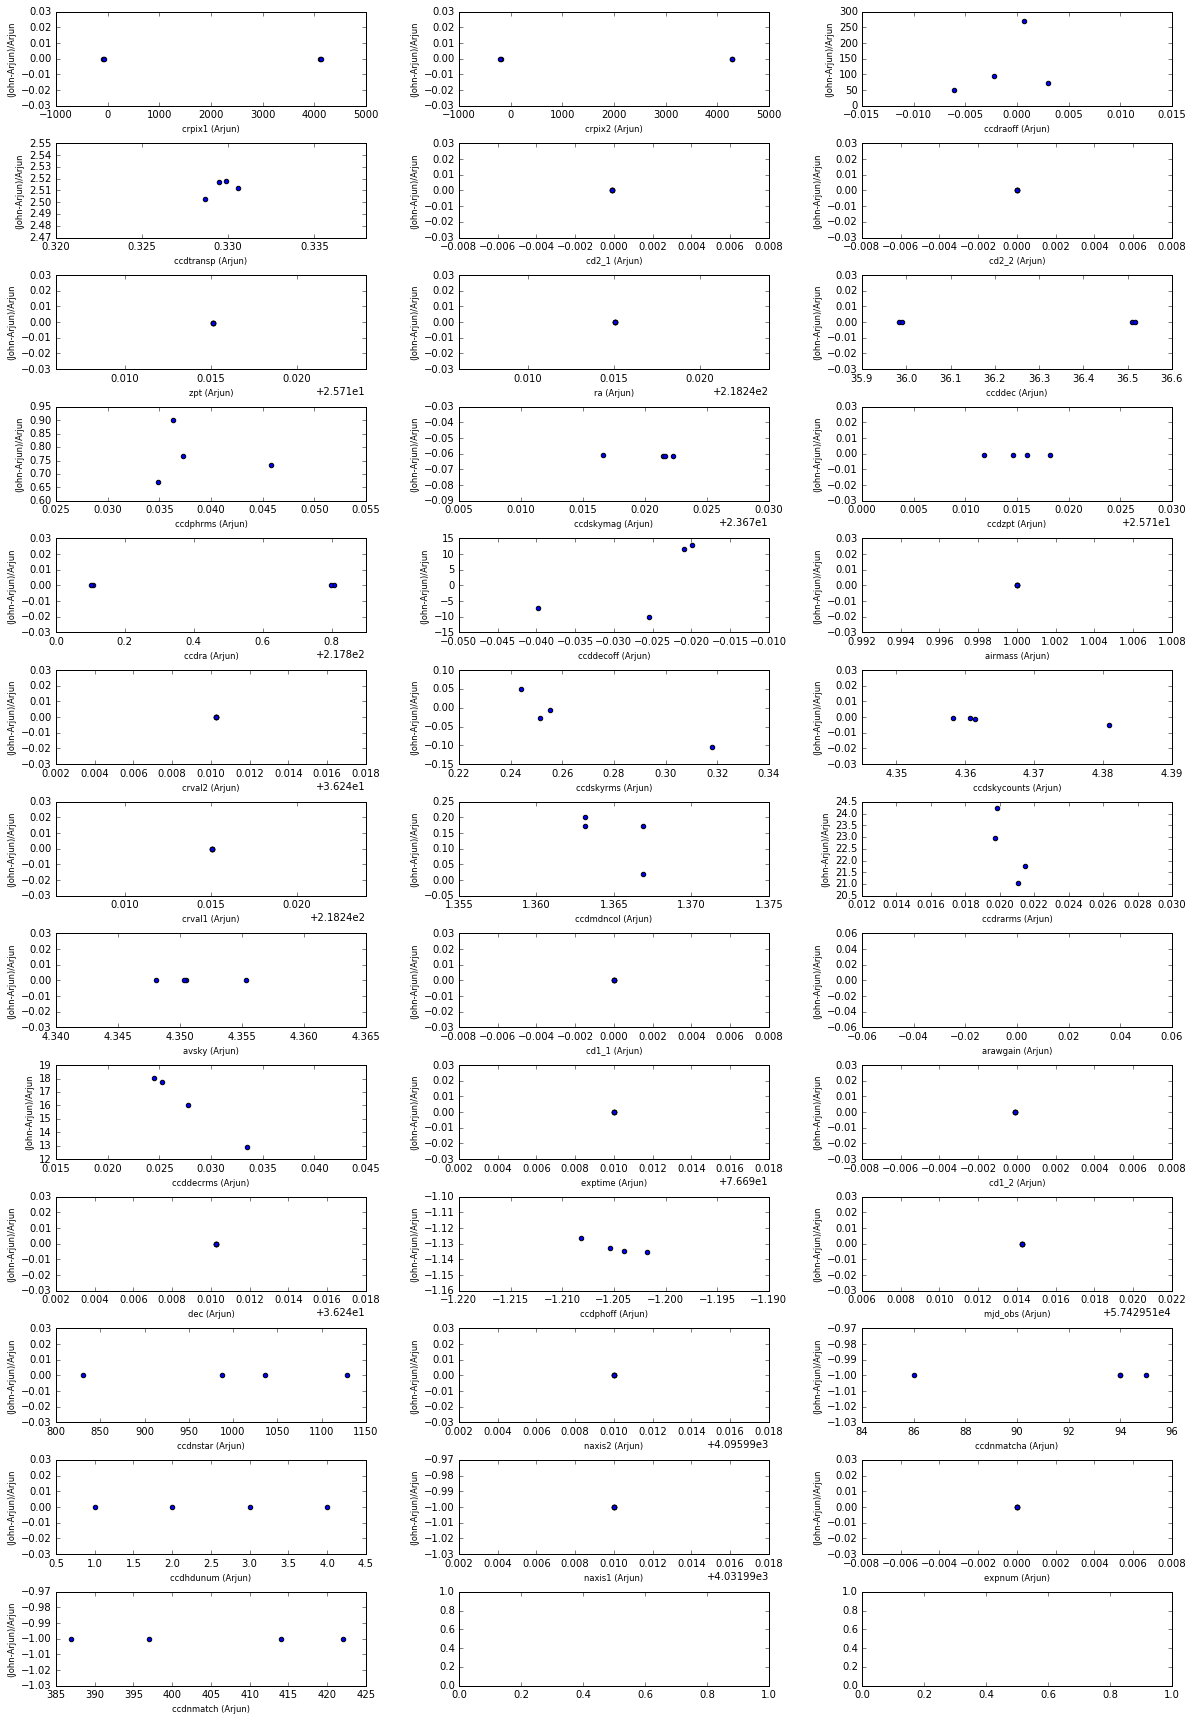

In [104]:
from translate import Translator,Converter
t=Translator(j,a,verbose=False)
t.compare()

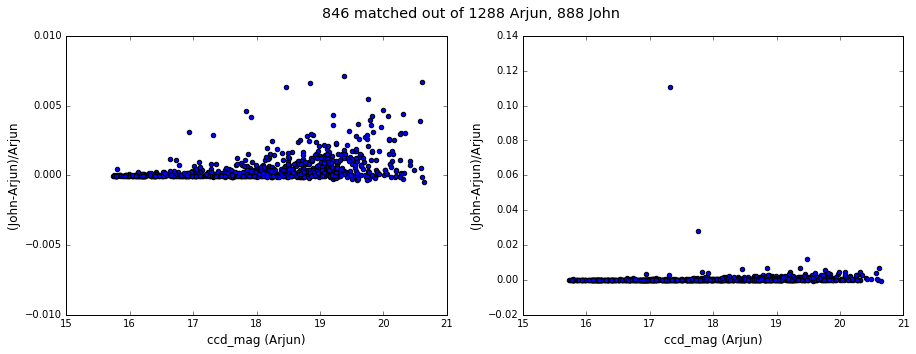

In [20]:
# j_stars.get('apmag')[imatch['obs']][:4],a_stars.get('ccd_mag')[imatch['ref']][:4]
fig,ax= plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(hspace=0,wspace=0.2)
for cnt in range(2):
    arjun= a_stars.get('ccd_mag')[imatch['ref']]
    john= j_stars.get('apmag')[imatch['obs']]
    y= (john-arjun)/arjun
    ylab=ax[cnt].set_ylabel('(John-Arjun)/Arjun',fontsize='large')
    if cnt == 0:
        ax[cnt].set_ylim(-0.01,0.01)
    ax[cnt].scatter(arjun,y)
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % 'ccd_mag',fontsize='large')
ti=plt.suptitle('%d matched out of %d Arjun, %d John' % \
                (imatch['ref'].size,len(a_stars),len(j_stars)), fontsize='x-large')
plt.savefig("magdiff.png",\
            bbox_extra_artists=[ti,xlab,ylab], bbox_inches='tight',dpi=150)

In [227]:
a.get_columns()

['filename',
 'object',
 'expnum',
 'exptime',
 'filter',
 'seeing',
 'ra',
 'dec',
 'date_obs',
 'mjd_obs',
 'ut',
 'ha',
 'airmass',
 'propid',
 'zpt',
 'avsky',
 'arawgain',
 'fwhm',
 'crpix1',
 'crpix2',
 'crval1',
 'crval2',
 'cd1_1',
 'cd1_2',
 'cd2_1',
 'cd2_2',
 'naxis1',
 'naxis2',
 'ccdhdunum',
 'ccdnum',
 'ccdname',
 'ccdra',
 'ccddec',
 'ccdzpt',
 'ccdzpta',
 'ccdzptb',
 'ccdzptc',
 'ccdzptd',
 'ccdphoff',
 'ccdphrms',
 'ccdskyrms',
 'ccdskymag',
 'ccdskycounts',
 'ccdraoff',
 'ccddecoff',
 'ccdrarms',
 'ccddecrms',
 'ccdtransp',
 'ccdnstar',
 'ccdnmatch',
 'ccdnmatcha',
 'ccdnmatchb',
 'ccdnmatchc',
 'ccdnmatchd',
 'ccdmdncol',
 'psfab',
 'psfpa',
 'temp',
 'badimg']

In [185]:
# j_stars.get('ps1_mag'),a.get('ccd_mag)[:-4]
a_stars.get_columns(),j_stars.get_columns()

(['filename',
  'expnum',
  'extname',
  'nmatch',
  'ccd_x',
  'ccd_y',
  'ccd_ra',
  'ccd_dec',
  'ccd_mag',
  'raoff',
  'decoff',
  'magoff',
  'gmag',
  'ps1_g',
  'ps1_r',
  'ps1_i',
  'ps1_z'],
 ['expid',
  'filter',
  'amplifier',
  'x',
  'y',
  'ra',
  'dec',
  'fwhm',
  'apmag',
  'gaia_ra',
  'gaia_dec',
  'ps1_mag',
  'ps1_gicolor'])

Matched: 676/906 objects


In [218]:
a_stars.get('ccd_mag')[imatch['ref']][:4],j_stars.get('apmag')[imatch['obs']][:4]

(array([ 16.10763931,  16.55428696,  16.22163773,  14.84264946], dtype=float32),
 array([ 16.11772728,  16.55412292,  16.21712875,  14.84238815], dtype=float32))

In [ ]:
keys=['ccd_mag','ra_off','dec_off','gmag',\
     'ps1_g','ps1_r','ps1_i','ps1_z']
fig,axes= plt.subplots(3,3,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in keys:
    cnt+=1
    if key in ['ra_off','dec_off']:
        akey=key.replace('_','')
    else: 
        akey=key
    arjun= a.get(akey)[imatch['ref']]
    john= j.get(key)[imatch['obs']]
    ax[cnt].scatter(arjun,(arjun-john)/arjun)
    ylab=ax[cnt].set_ylabel('%s (Arjun-John)/Arjun' % key,fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % akey,fontsize='large')
##
fig,axes= plt.subplots(3,3,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in keys:
    cnt+=1
    if key in ['ra_off','dec_off']:
        akey=key.replace('_','')
    else: 
        akey=key
    arjun= a.get(akey)[imatch['ref']]
    john= j.get(key)[imatch['obs']]
    ax[cnt].scatter(arjun,john)
    ylab=ax[cnt].set_ylabel('%s (John)' % key,fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (Arjun)' % akey,fontsize='large')

In [180]:
a.get('ccd_mag')[imatch['ref']][:4],j.get('ccd_mag')[imatch['obs']][:4]-2.5*np.log10(1.8)


(array([ 16.10763931,  16.55428696,  16.22163773,  14.84264946], dtype=float32),
 array([ 16.11772728,  16.55412292,  16.21712875,  14.84238815], dtype=float32))

In [122]:
j_cat,a_cat= [],[]
mydir='/global/homes/k/kaylanb/repos/thesis_code/zeropoints/data/'
fns=glob.glob(os.path.join(mydir,'stars_fits/stars2zero*v2-stars.fits'))
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(mydir,'original/',os.path.basename(fn).replace('stars2zeropoint','matches'))
    a_fn= a_fn.replace('v2-stars','v2')
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

# stars2zeropoint-k4m_160203_035758_ooi_zd_v2-stars.fits

In [148]:
# a.get_columns(),j.get_columns()
# j.get('expid')
i= (a.get('filename') == 'k4m_160203_043955_ooi_zd_v2.fits')*(a.get('extname') == 'ccd1')
a.get('expnum')[i],a.get('extname')[i],np.where(i)[0].size
a.get('filename')

array(['k4m_160203_043955_ooi_zd_v2.fits',
       'k4m_160203_043955_ooi_zd_v2.fits',
       'k4m_160203_043955_ooi_zd_v2.fits', ...,
       'k4m_160203_035758_ooi_zd_v2.fits',
       'k4m_160203_035758_ooi_zd_v2.fits',
       'k4m_160203_035758_ooi_zd_v2.fits'], 
      dtype='|S32')

In [22]:
import fitsio
fn='/project/projectdirs/cosmo/staging/mosaicz/MZLS_CP/CP20160202v2/k4m_160203_015632_ood_zd_v2.fits.fz'
mask,j= fitsio.read(fn, ext=1, header=True)

In [41]:
obj = daofind(img, fwhm=self.nominal_fwhm,
              threshold=det_thresh*sig1,
              exclude_border=True)



ImportError: No module named photutils

In [50]:
fn='/project/projectdirs/cosmo/staging/mosaicz/MZLS_CP/CP20160202v2/k4m_160203_015632_ooi_zd_v2.fits.fz'
img, hdr = fitsio.read(fn, ext='CCD1', header=True)
mask,j=fitsio.read(fn.replace('ooi','ood'), ext='CCD1', header=True)


In [51]:
obj = daofind(img, fwhm=5.,
                      threshold=162.6255,
                      exclude_border=True)

        Use DAOStarFinder instead. [astropy.utils.decorators]


In [79]:
a=fitsio.FITS('/project/projectdirs/cosmo/work/gaia/chunks-ps1-gaia/chunk-08093.fits')

In [111]:
a=fits_table('/project/projectdirs/cosmo/work/gaia/chunks-ps1-gaia/chunk-08093.fits')

In [108]:
# a.get('median')[0] - a.get('median')[2]
b=fits_table()
b.set('a',a.get('ra'))
b.set('name','hello')
print b.get('a'),a.get('ra'),b.get('name')

[ 260.56010698  261.29849345  261.03800081 ...,  261.22777845  260.65955264
  260.94242335] [ 260.56010698  261.29849345  261.03800081 ...,  261.22777845  260.65955264
  260.94242335] hello


In [114]:
a.get('phot_g_mean_mag').shape

(47248,)

In [74]:
img.shape,obj['xcentroid'].min(),obj['xcentroid'].max(),obj['ycentroid'].min(),obj['ycentroid'].max()

((4079, 4054),
 47.426290620312734,
 4045.8471549771903,
 15.348525160577438,
 4044.5010258396478)

In [53]:
aprad=3.5
pixscale=0.25961
ap = CircularAperture((obj['xcentroid'], obj['ycentroid']), aprad / pixscale)


In [54]:
mask_phot = aperture_photometry(mask, ap)
mask_flux = mask_phot['aperture_sum']

In [70]:
mask.

['id', u'xcenter', u'ycenter', 'aperture_sum']

In [67]:
pixsc=0.26
psfrad = 10./pixsc
fitrad = 3./pixsc
np.around(psfrad+fitrad)

50.0

In [306]:
# def get_trans_john(j):
#     zp0=26.552 #-2.5*np.log10(j.get('exptime'))#+2.5*np.log10(j.get('gain'))
#     k0=0.06
#     trans= 10.**(-0.4 * (zp0 - j.get('zpt') - k0 * (j.get('airmass') - 1.0)))
#     return trans*10**(-0.4*(-j.get('phoff')))

# def get_trans_arjun(a,j2a):
#     zp0=26.552 #+2.5*np.log10(j.get('gain'))
#     k0=0.06
#     trans= 10.**(-0.4 * (zp0 - a.get( j2a['zpt'] ) - k0 * (a.get( j2a['airmass'] ) - 1.0)))
#     return trans*10**(-0.4*(-a.get( j2a['phoff'] )))

def get_trans(medmag,airmass):
    k0=0.06
    return 10.**(-0.4 * (-medmag - k0*(airmass-1.0)))

# def get_trans_arjun(a,j2a):
#     zp0=26.552 #+2.5*np.log10(j.get('gain'))
#     k0=0.06
#     trans= 10.**(-0.4 * (zp0 - a.get( j2a['zpt'] ) - k0 * (a.get( j2a['airmass'] ) - 1.0)))
#     return trans*10**(-0.4*(-a.get( j2a['phoff'] )))

a_medmag= t.a.get( t.j2a['phoff'] )
a_airmass= t.a.get( t.j2a['airmass'] )
t.j.get('transp')[-4:],get_trans(t.j.get('phoff'),t.j.get('airmass'))[-4:],\
t.a.get( t.j2a['transp'] )[-4:],get_trans(a_medmag,a_airmass)[-4:]

(array([ 0.54896259,  0.57598132,  0.55402762,  0.60514569], dtype=float32),
 array([ 0.54896259,  0.57598132,  0.55402762,  0.60514569], dtype=float32),
 array([ 0.86987442,  0.86994928,  0.8706128 ,  0.86774069], dtype=float32),
 array([ 0.86987364,  0.86994928,  0.8706128 ,  0.86774105], dtype=float32))

In [307]:
j.get('zpt')[-4:],t.a.get( t.j2a['zpt'] )[-4:]

(array([ 26.61964035,  26.62608337,  26.61269188,  26.59475136], dtype=float32),
 array([ 26.39992142,  26.40001488,  26.40084267,  26.39725494], dtype=float32))

In [314]:
# t.j.get('zpt')[-4:]-t.j.get('phoff')[-4:]-2.5*np.log10(t.j.get('gain')[-4:]),\
t.j.get('zpt')[-4:]-t.j.get('phoff')[-4:],\
t.a.get( t.j2a['zpt'] )[-4:] - t.a.get( t.j2a['phoff'] )[-4:]

(array([ 27.27150345,  27.22578239,  27.25458336,  27.14082146], dtype=float32),
 array([ 26.55200195,  26.55200005,  26.55200005,  26.55200005], dtype=float32))

In [322]:
t.j.get('phoff')[-4:],t.a.get( t.j2a['phoff'] )[-4:],\
t.j.get('phoff')[-4:]+2.5*np.log10(t.j.get('gain'))[-4:]

(array([-0.6518631 , -0.59969902, -0.64189148, -0.5460701 ], dtype=float32),
 array([-0.15207958, -0.15198517, -0.15115738, -0.15474463], dtype=float32),
 array([ 0.06764126,  0.07408333,  0.06069195,  0.04275101], dtype=float32))

In [40]:
from translate import Translator

# Merge tables
# a for Arjun, j for John
j_cat,a_cat= [],[]
fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/old/zeropoint*v2.fits')
for fn in fns:
    j_cat.append( fits_table(fn) )
    a_fn= os.path.join(os.path.dirname(fn), 'arjun_'+os.path.basename(fn))
    a_cat.append( fits_table(a_fn) )
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/zeropoint*v2.fits')
# for fn in fns:
#     a_cat.append( fits_table(fn) )
#     j_fn= os.path.join(os.path.dirname(fn), 'units_1arcsec_'+os.path.basename(fn))
#     j_cat.append( fits_table(j_fn) )
j = merge_tables(j_cat, columns='fillzero')
a = merge_tables(a_cat, columns='fillzero')

t=Translator(j,a)
# t.save()

John --> Arjun
nstar --> ccdnstar
crpix1 --> crpix1
crpix2 --> crpix2
raoff --> ccdraoff
transp --> ccdtransp
height --> naxis2
cd2_1 --> cd2_1
cd2_2 --> cd2_2
zptavg --> zpt
propid --> propid
ra_bore --> ra
dec --> ccddec
phrms --> ccdphrms
skymag --> ccdskymag
image_hdu --> ccdhdunum
zpt --> ccdzpt
width --> naxis1
ra --> ccdra
decoff --> ccddecoff
image_filename --> filename
airmass --> airmass
crval2 --> crval2
skyrms --> ccdskyrms
skycounts --> ccdskycounts
crval1 --> crval1
ccdname --> ccdname
object --> object
mdncol --> ccdmdncol
rarms --> ccdrarms
avsky --> avsky
cd1_1 --> cd1_1
gain --> arawgain
expnum --> expnum
ha --> ha
decrms --> ccddecrms
exptime --> exptime
nmatch --> ccdnmatch
cd1_2 --> cd1_2
date_obs --> date_obs
ut --> ut
filter --> filter
dec_bore --> dec
phoff --> ccdphoff
mjd_obs --> mjd_obs
----
missing from Johns
----
camera
expid
pixscale
----
missing from Arjuns
----
seeing
fwhm
ccdnum
ccdzpta
ccdzptb
ccdzptc
ccdzptd
ccdnmatcha
ccdnmatchb
ccdnmatchc
ccdnmatchd

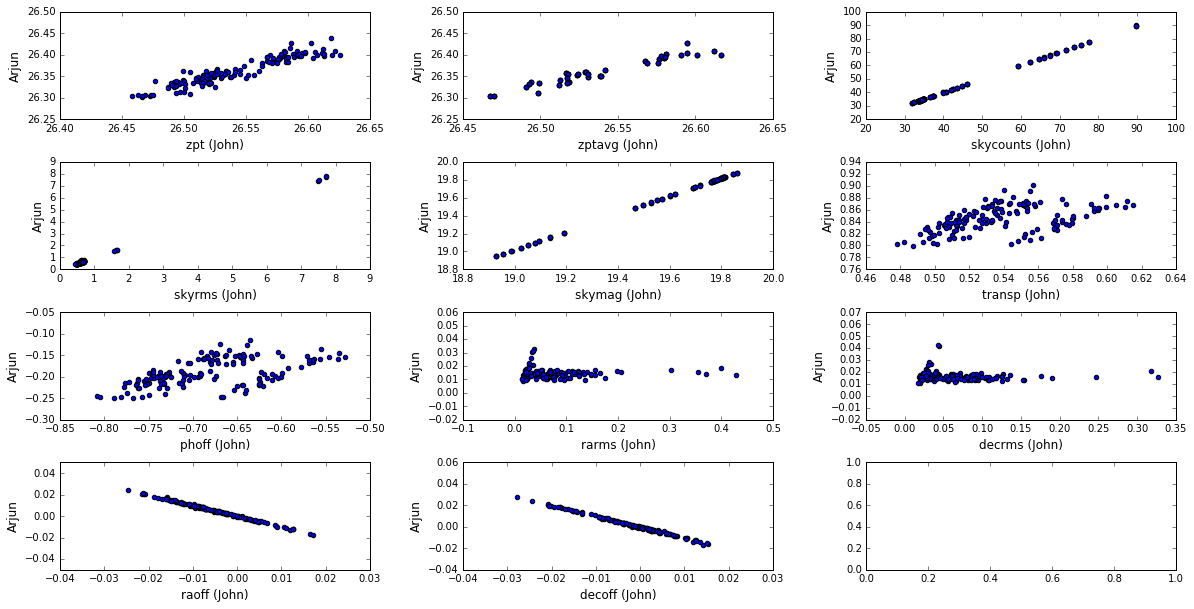

In [42]:
discrep_keys=['zpt','zptavg',\
              'skycounts','skyrms','skymag',\
              'transp','phoff','rarms','decrms','raoff','decoff']
def convert_j2a(j,key):
    if key in ['skycounts','skyrms']:
        return j.get(key)/j.get('exptime')
    elif key in ['skymag']:
        return j.get(key)-2.5*np.log10(j.get('gain'))
    else:
        return j.get(key)
            
panels=len(discrep_keys)
cols=3
if panels % cols == 0:
    rows=panels/cols
else:
    rows=panels/cols+1
fig,axes= plt.subplots(rows,cols,figsize=(20,10))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.4,wspace=0.3)
cnt=-1
for key in discrep_keys:
    cnt+=1
    arjun= t.a.get( t.j2a[key] )
    john= convert_j2a(t.j,key)
    if key == 'skymag':
        arjun=arjun[ t.j.get('exptime') > 50]
        john=john[ t.j.get('exptime') > 50]
    ax[cnt].scatter(john,arjun)
    ylab=ax[cnt].set_ylabel('Arjun',fontsize='large')
    xlab=ax[cnt].set_xlabel('%s (John)' % key,fontsize='large')

# Old Below

In [202]:
# Keys with SAME NAME
fig,axes= plt.subplots(4,4,figsize=(18,10))
ax=axes.flatten()
hw=0.4
plt.subplots_adjust(hspace=hw,wspace=hw)
cnt=-1
for key in sj.intersection(sa):
    if key in ['date_obs','filter','object','propid','ccdname']:
        continue
    if key in ['ha','ut']:
        continue
    if key in ['zpt']:
        continue #A zpt not -> J zpt
    cnt+=1
    y= (a.get(key) - j.get(key))/a.get(key)
    ax[cnt].scatter(a.get(key),y) 
    xlab=ax[cnt].set_xlabel('A: %s' % key)
    ylab=ax[cnt].set_ylabel('(A-J)/A: %s' % key)
    ax[cnt].set_ylim([-0.01,0.01])
plt.savefig("same_keys_same_data.png",\
            bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

36

----
String comparison, John --> Arjun
----
propid:2016A-0453 --> propid:2016A-0453
image_filename:/scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201 --> filename:k4m_160203_015632_ooi_zd_v2.fits
ccdname:CCD1 --> ccdname:ccd1
object:OBJECT Observation(s) --> object:OBJECT Observation(s)
ha:00:20:54.24 --> ha:00:20:54.24
date_obs:2016-02-03 --> date_obs:2016-02-03
ut:01:56:32 --> ut:01:56:32
filter:z --> filter:z


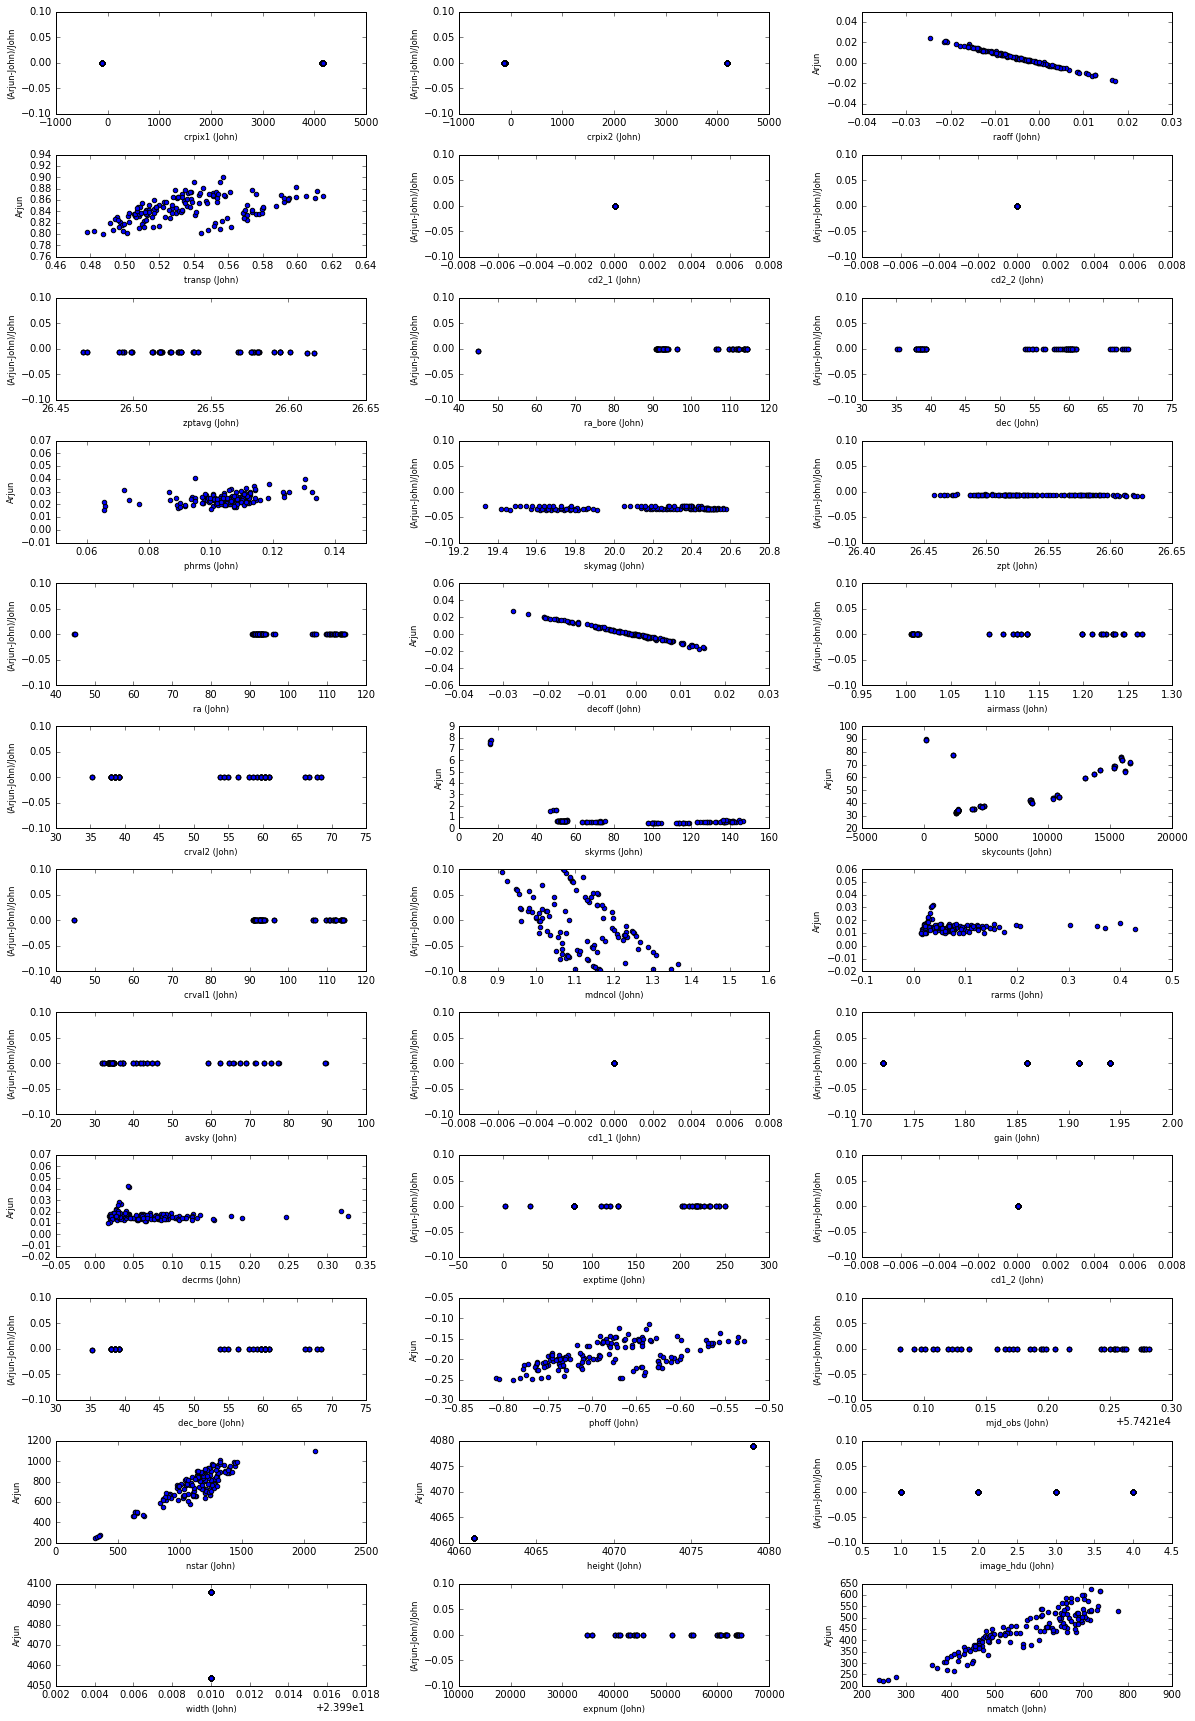

In [82]:
print "rows: John=%d, Arjun=%d" % (len(j),len(a))
print "cols: John=%d, Arjun=%d" % (len(j.get_columns()),len(a.get_columns()))

def pset(s):
    print np.sort(list(s))

sj,sa= set(j.get_columns()),set(a.get_columns())
print "Both:\n",pset(sj.intersection(sa))
print "Arjun Only:\n",pset(sa.difference(sj))
print "John Only:\n",pset(sj.difference(sa))

rows: John=148, Arjun=148
cols: John=47, Arjun=59
Both:
['airmass' 'avsky' 'ccdname' 'cd1_1' 'cd1_2' 'cd2_1' 'cd2_2' 'crpix1'
 'crpix2' 'crval1' 'crval2' 'date_obs' 'dec' 'expnum' 'exptime' 'filter'
 'ha' 'mjd_obs' 'object' 'propid' 'ra' 'ut' 'zpt']
None
Arjun Only:
['arawgain' 'badimg' 'ccddec' 'ccddecoff' 'ccddecrms' 'ccdhdunum'
 'ccdmdncol' 'ccdnmatch' 'ccdnmatcha' 'ccdnmatchb' 'ccdnmatchc'
 'ccdnmatchd' 'ccdnstar' 'ccdnum' 'ccdphoff' 'ccdphrms' 'ccdra' 'ccdraoff'
 'ccdrarms' 'ccdskycounts' 'ccdskymag' 'ccdskyrms' 'ccdtransp' 'ccdzpt'
 'ccdzpta' 'ccdzptb' 'ccdzptc' 'ccdzptd' 'filename' 'fwhm' 'naxis1'
 'naxis2' 'psfab' 'psfpa' 'seeing' 'temp']
None
John Only:
['camera' 'dec_bore' 'decoff' 'decrms' 'expid' 'gain' 'height'
 'image_filename' 'image_hdu' 'mdncol' 'nmatch' 'nstar' 'phoff' 'phrms'
 'pixscale' 'ra_bore' 'raoff' 'rarms' 'skycounts' 'skymag' 'skyrms'
 'transp' 'width' 'zptavg']
None


In [149]:
j.get('expid')[:2],j.get('image_filename')[:2]

(array(['00015632-CCD1', '00015632-CCD2'], 
       dtype='|S16'),
 array(['/scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201',
        '/scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201'], 
       dtype='|S65'))

In [131]:
a.get('ccdra')[:4],j.get('ra')[:4],a.get('ccdra')[:4]

(array([ 44.57461481,  44.57441716,  44.9539877 ,  44.95623023]),
 array([ 44.57457114,  44.57437284,  44.95394341,  44.95618627]),
 array([ 44.57461481,  44.57441716,  44.9539877 ,  44.95623023]))

In [97]:
a.get('ccdrarms')[:4],j.get('rarms')[:4]

(array([ 0.03224996,  0.02602155,  0.03000374,  0.03094478], dtype=float32),
 array([ 0.03793217,  0.03256905,  0.03435664,  0.03501526], dtype=float32))

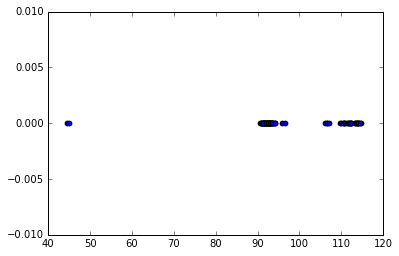

In [101]:
a_key,j_key= 'ccdra','ra'
y= (a.get(a_key) - j.get(j_key))/a.get(a_key)
plt.scatter(a.get(a_key),y)

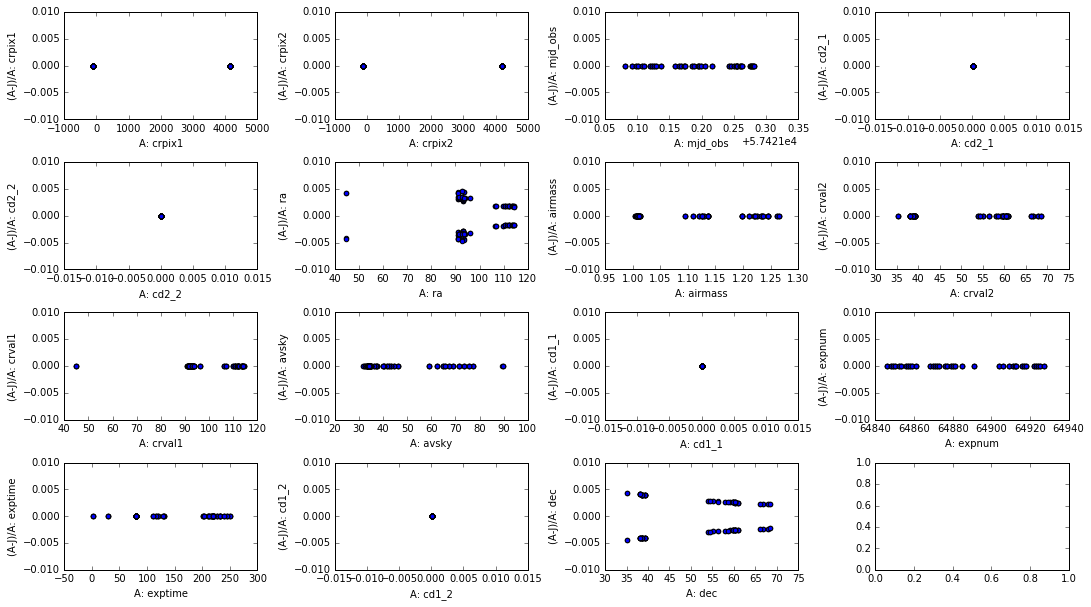

In [88]:
# Keys with SAME NAME
fig,axes= plt.subplots(4,4,figsize=(18,10))
ax=axes.flatten()
hw=0.4
plt.subplots_adjust(hspace=hw,wspace=hw)
cnt=-1
for key in sj.intersection(sa):
    if key in ['date_obs','filter','object','propid','ccdname']:
        continue
    if key in ['ha','ut']:
        continue
    if key in ['zpt']:
        continue #A zpt not -> J zpt
    cnt+=1
    y= (a.get(key) - j.get(key))/a.get(key)
    ax[cnt].scatter(a.get(key),y) 
    xlab=ax[cnt].set_xlabel('A: %s' % key)
    ylab=ax[cnt].set_ylabel('(A-J)/A: %s' % key)
    ax[cnt].set_ylim([-0.01,0.01])
plt.savefig("same_keys_same_data.png",\
            bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
    

## Mapping between Arjun's and John's keys

Use the `%%file` magic function to save code to a file `maps.py`. We can then import it as a **module** 

In [89]:
%%file maps.py

import numpy as np
def a2j(key):
    d= dict(arawgain='gain',\
            ccddec='dec_bore',\
            ccdra='ra_bore',\
            ccddecoff='decoff',\
            ccdraoff='raoff',\
            ccddecrms='decrms',\
            ccdrarms='rarms',\
            ccdhdunum='image_hdu',\
            ccdmdncol='mdncol',\
            ccdnmatch='nmatch',\
            ccdnstar='nstar',\
            ccdphoff='phoff',\
            ccdphrms='phrms',\
            ccdskycounts='skycounts',\
            ccdskymag='skymag',\
            ccdskyrms='skyrms',\
            ccdtransp='transp',\
            ccdzpt='zpt',\
            zpt='zptavg',\
            filename='image_filename',\
            naxis1='width',\
            naxis2='height')
    return d[key]

def lims_for_key(key):
    d= dict(arawgain=0.05,\
            ccddec=0.05,\
            ccdra=0.05,\
            ccddecoff='none',\
            ccdraoff='none',\
            ccddecrms='none',\
            ccdrarms='none',\
            ccdhdunum='none',\
            ccdmdncol=0.15,\
            ccdnmatch='none',\
            ccdnstar='none',\
            ccdphoff='none',\
            ccdphrms='none',\
            ccdskycounts='none',\
            ccdskymag='none',\
            ccdskyrms='none',\
            ccdtransp='none',\
            ccdzpt=0.05,\
            zpt=0.02,\
            filename='none',\
            naxis1='none',\
            naxis2='none')
    return d[key]

def a_not_in_j():
    return ['badimg','ccdnum',\
          'ccdnmatcha','ccdnmatchb','ccdnmatchc','ccdnmatchd',\
          'ccdzpta','ccdzptb','ccdzptc','ccdzptd',\
          'fwhm','psfab','psfpa','seeing','temp']
    
def j_not_in_a():
    return ['camera','expid','pixscale']

def convert_j2a(j,key):
    '''multiply john's number by this to convert to arjuns'''
    plus= dict(phoffadfafd=2.5*np.log10(j.get('gain')),\
            )
    mult= dict(phoffaggg=j.get('gain'),\
               skycountsadfa=1./j.get('exptime')
            )
    if key in plus.keys():
        return j.get(key)+plus[key]
    elif key in mult.keys():
        return j.get(key)*mult[key]
    else:
        return j.get(key)

Overwriting maps.py


cnt=19


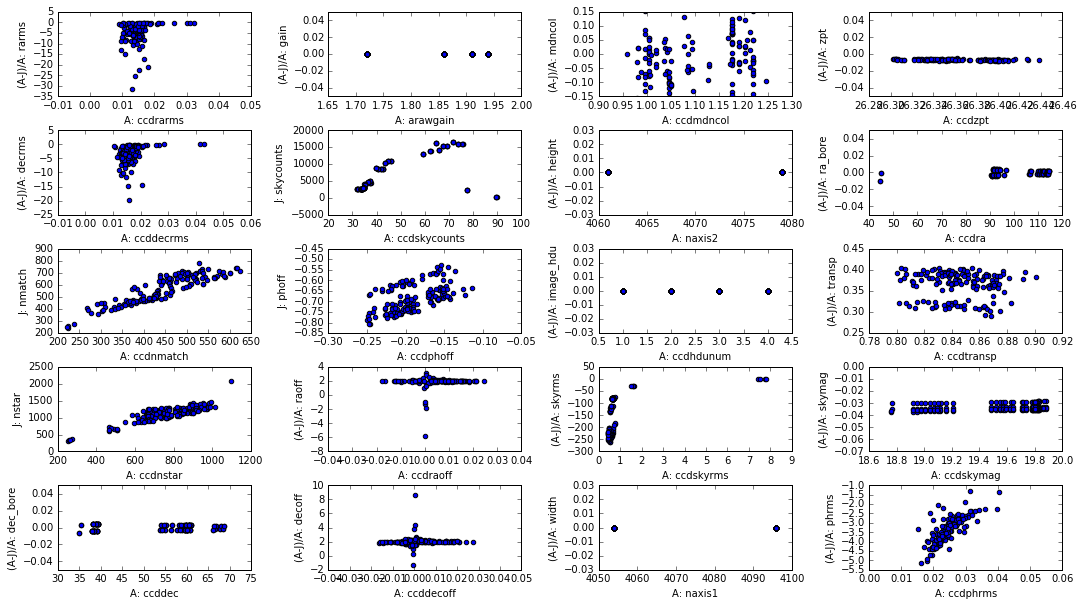

In [90]:
# SAME DATA, Different keys
import maps
fig,axes= plt.subplots(5,4,figsize=(18,10))
ax=axes.flatten()
hw=0.4
plt.subplots_adjust(hspace=hw,wspace=hw)
cnt=-1
# Arjun only
for key in sa.difference(sj):
    #avoid= 
    if key in maps.a_not_in_j():
        continue
    if key in ['filename']:
        continue
    cnt+=1
    jval= maps.convert_j2a(j, maps.a2j(key) )
    if key in ['ccdnmatch','ccdnstar','ccdskycounts','ccdphoff']:
#         y= j.get( maps.a2j(key) )
        y=jval
        ax[cnt].scatter(a.get(key),y) 
        xlab=ax[cnt].set_xlabel('A: %s' % key)
        ylab=ax[cnt].set_ylabel('J: %s' % maps.a2j(key) )
    else:
#         y= (a.get(key) - j.get( maps.a2j(key) ))/a.get(key)
        y= (a.get(key) - jval)/a.get(key)
        ax[cnt].scatter(a.get(key),y) 
        xlab=ax[cnt].set_xlabel('A: %s' % key)
        ylab=ax[cnt].set_ylabel('(A-J)/A: %s' % maps.a2j(key) )
    ylim= maps.lims_for_key(key)
    if ylim != 'none':
        ax[cnt].set_ylim([-ylim,ylim])
plt.savefig("same_data_diff_keys.png",\
            bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
print "cnt=%d" % cnt

In [46]:
# If STRINGS not identicial, print them 
same= ['date_obs','filter','object','propid','ccdname','ha','ut']
mapped= ['filename']
for key in same:
    if a.get(key)[0] != j.get(key)[0]:
        print "Arjuns, Johns (%s)" % key
        for i in range(4): print a.get(key)[i],j.get(key)[i]
for key in mapped:
    if a.get(key)[0] != j.get( maps.a2j(key) )[0]:
        print "Arjuns, Johns (%s)" % key
        for i in range(4): print a.get(key)[i],j.get( maps.a2j(key) )[i]


Arjuns, Johns (ccdname)
ccd1 CCD1
ccd2 CCD2
ccd3 CCD3
ccd4 CCD4
Arjuns, Johns (filename)
k4m_160203_021214_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201
k4m_160203_021214_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201
k4m_160203_021214_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201
k4m_160203_021214_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201


In [47]:
# Totally DIFFERENT keys, print them
print "Arjun:"
for key in maps.a_not_in_j():
    print "%s: " % key, a.get(key)[0]
    
print "\nJohn:"
for key in maps.j_not_in_a():
    print "%s: " % key, j.get(key)[0]

Arjun:
badimg:  0
ccdnum:  1
ccdnmatcha:  100
ccdnmatchb:  95
ccdnmatchc:  117
ccdnmatchd:  117
ccdzpta:  26.372
ccdzptb:  26.3575
ccdzptc:  26.3725
ccdzptd:  26.3681
fwhm:  1.999
psfab:  1.0948
psfpa:  113.972
seeing:  2.23042
temp:  -0.9

John:
camera:  mosaic3
expid:  00021214-CCD1
pixscale:  0.259628


# ra,dec covered during MzLS Feb2016

what bricks should I run for the v2, v3 comparison?

In [15]:
# Merge tables
a=[]
# fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/arjuns_feb2016_v2/zeropoint-k4m_160207_125*_ooi_zd_v2.fits')
fns=glob.glob('/project/projectdirs/desi/users/burleigh/test_data/arjuns_feb2016_v2/zeropoint-*v2.fits')
for fn in fns:
    a.append( fits_table(fn) )
a = merge_tables(a, columns='fillzero')

In [25]:
a= fits_table('/project/projectdirs/desi/users/burleigh/test_data/arjuns_feb2016_v2/mzls-zpt-2016feb-v2.fits')

In [30]:
bricks=fits_table('/project/projectdirs/desi/users/burleigh/test_data/survey-bricks.fits.gz')

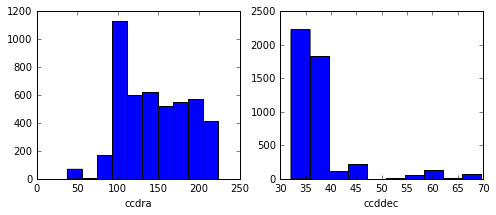

In [26]:
fix,ax= plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=0.2)
for cnt,key in zip(range(2),['ccdra','ccddec']):
    ax[cnt].hist(a.get(key))
    ax[cnt].set_xlabel(key)

In [46]:
bricks.get_columns()

['brickname',
 'brickid',
 'brickq',
 'brickrow',
 'brickcol',
 'ra',
 'dec',
 'ra1',
 'ra2',
 'dec1',
 'dec2']

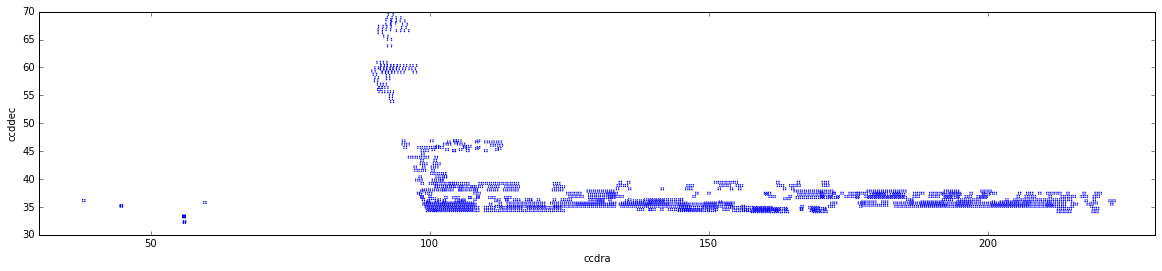

In [68]:
fix,ax= plt.subplots(figsize=(20,4))
xlim=[30,230]
ylim=[30,70]

ax.scatter(a.get('ccdra'),a.get('ccddec'),c='b',edgecolors='none',s=2.)
xlab=ax.set_xlabel('ccdra')
ylab=ax.set_ylabel('ccddec')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.savefig('coverage_1.png',bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

In [38]:
len(bricks),len(bricks[ind])

(662174, 3344)

In [69]:
bricks.get_brickname('')

<bound method tabledata.get_columns of <tabledata object with 662174 rows and 11 columns: brickname, brickq, ra2, ra, ra1, brickrow, brickcol, dec, dec1, dec2, brickid>>

662174 1671


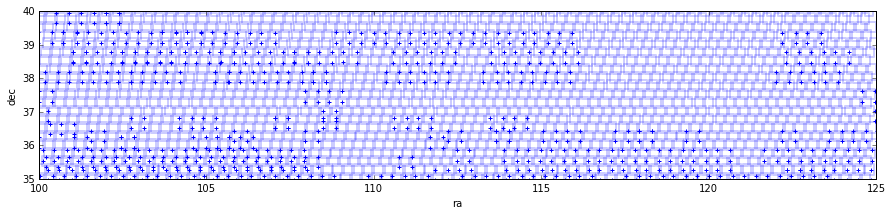

In [64]:
xlim=[100,125]
ylim=[35,40]
ind=np.all((bricks.get('ra') >= xlim[0],bricks.get('ra') <= xlim[1],\
            bricks.get('dec') >= ylim[0],bricks.get('dec') <= ylim[1]),axis=0)
print len(bricks),len(bricks[ind])

fix,ax= plt.subplots(figsize=(15,3))
# CCD centers
ax.scatter(a.get('ccdra'),a.get('ccddec'),c='b',edgecolors='none',marker='+',s=20.)
# Brick boundaries
patches = []
for ra1,ra2,dec1,dec2 in zip(bricks[ind].get('ra1'),bricks[ind].get('ra2'),\
                            bricks[ind].get('dec1'),bricks[ind].get('dec2')):
    rect = mpatches.Rectangle((ra1,dec1),dec2-dec1,ra2-ra1, \
                              color='none',fc='none',ec="r")
    patches.append(rect)
collection = PatchCollection(patches, alpha=0.2, facecolors='none',edgecolors='b',linewidths=2) #cmap=['r']*len(plt.cm.hsv), alpha=0.2)
ax.add_collection(collection)

# plt.scatter(bricks.get('ra')[ind],bricks.get('dec')[ind],c='r',marker='+',edgecolors='none',s=5.)

xlab=plt.xlabel('ra')
ylab=plt.ylabel('dec')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.savefig('coverage_2.png',bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

662174 337
wrote brick_list.txt


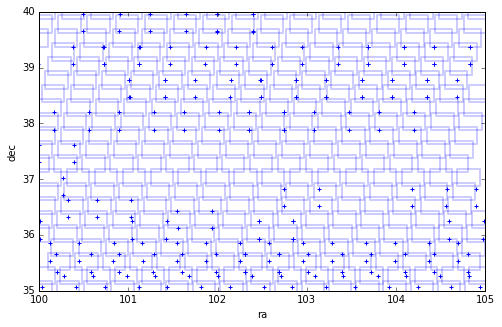

In [71]:
xlim=[100,105]
ylim=[35,40]
ind=np.all((bricks.get('ra') >= xlim[0],bricks.get('ra') <= xlim[1],\
            bricks.get('dec') >= ylim[0],bricks.get('dec') <= ylim[1]),axis=0)
print len(bricks),len(bricks[ind])

fn='brick_list.txt'
if os.path.exists(fn):
    os.remove(fn)
fin=open(fn,'w')
for bri in bricks[ind].get('brickname'):
    fin.write('%s\n' % bri)
fin.close()
print 'wrote %s' % fn

fix,ax= plt.subplots(figsize=(8,5))
# CCD centers
ax.scatter(a.get('ccdra'),a.get('ccddec'),c='b',edgecolors='none',marker='+',s=20.)
# Brick boundaries
patches = []
for ra1,ra2,dec1,dec2 in zip(bricks[ind].get('ra1'),bricks[ind].get('ra2'),\
                            bricks[ind].get('dec1'),bricks[ind].get('dec2')):
    rect = mpatches.Rectangle((ra1,dec1),dec2-dec1,ra2-ra1, \
                              color='none',fc='none',ec="r")
    patches.append(rect)
collection = PatchCollection(patches, alpha=0.2, facecolors='none',edgecolors='b',linewidths=2) #cmap=['r']*len(plt.cm.hsv), alpha=0.2)
ax.add_collection(collection)

# plt.scatter(bricks.get('ra')[ind],bricks.get('dec')[ind],c='r',marker='+',edgecolors='none',s=5.)

xlab=plt.xlabel('ra')
ylab=plt.ylabel('dec')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.savefig('coverage_3.png',bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

(35, 42)

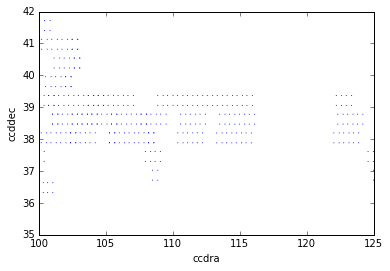

In [24]:
plt.scatter(a.get('ccdra'),a.get('ccddec'),c='b',edgecolors='none',s=1.)
xlab=plt.xlabel('ccdra')
ylab=plt.ylabel('ccddec')
plt.xlim([100,125])
plt.ylim([35,42])

# CP Images

In [82]:
m=fitsio.FITS('/project/projectdirs/cosmo/staging/mosaicz/MZLS_CP/CP20160225v2/k4m_160226_024444_ooi_zd_v2.fits.fz')
b=fitsio.FITS('/project/projectdirs/cosmo/staging/bok/BOK_CP/CP20160404/ksb_160405_032305_ooi_r_v1.fits.fz')
bok=b[1].read()
mos=m[1].read()

([array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 4096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([  4.09500000e+03,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.000000

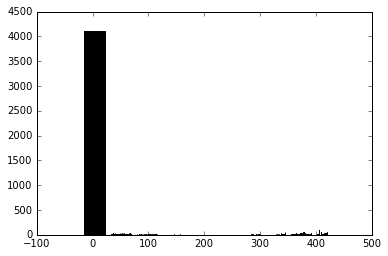

In [4]:
plt.hist(bok)

In [83]:
m=fitsio.FITS('/project/projectdirs/cosmo/staging/mosaicz/MZLS_Raw/20160225/k4m_160226_024444_ori.fits.fz')
b=fitsio.FITS('/project/projectdirs/cosmo/staging/bok/BOK_Raw/20160404/ksb_160405_032305_ori.fits.fz')
rawbok=b[1].read()
rawmos=m[1].read()
for im,name in zip([rawmos,rawbok],['rawmos','rawbok']):
    print "%s:" % name,im.min(),im.max(),np.median(im),np.std(im)

rawmos: 3314 56790 7679.0 1347.98664375
rawbok: 1014 65535 4108.0 1619.81314105


In [90]:
# BOK -- reverse axis of BIASEC
print b[1].read_header()['BIASSEC']
data= rawbok[0:2048,0:2017] # Reverse xy of above for BOK
bias= rawbok[0:2048,2017:2036]
# finish 
hd=b[0].read_header()
expt=hd['EXPTIME']
gain=1.3
(np.median(data)-np.median(bias))*gain/expt, np.median(bok)

[2017:2036,1:2048]


(17.116388532306377, 16.592028)

In [87]:
b[0].read_header()


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                    8 / array data type
NAXIS   =                    0 / number of array dimensions
EXTEND  =                    T
NEXTEND =                   16 / Number of extensions
DETSIZE = '[1:8064,1:8192]'    / Detector size
CCDSUM  = '1 1     '           / CCD pixel summing
CCDBIN1 =                    1 / Binning factor along axis 1
CCDBIN2 =                    1 / Binning factor along axis 2
FILENAME= 'TempImage2402.fits' / base filename at acquisition
NCCDS   =                    4 / Number of CCDs
NAMPS   =                   16 / Number of amplifiers
COMMENT ==================================================================
COMMENT Controller
COMMENT ==================================================================
DARKTIME=              233.802 / Dark time (seconds)
DATE    = '2016-04-05'         / UTC date and time file writtten
DATE-OBS= '2016-04-05T03:23:05.932' / UTC shutter opened
EXPREQ  =         

In [18]:
# MOS: RAW --> CP
hd=m[0].read_header()
expt=hd['EXPTIME']
gain=1.8
np.median(mos),(np.median(rawmos)-rawmos[2066:2112,18:2065].mean())*gain/expt

(83.436836, 82.961131410262098)

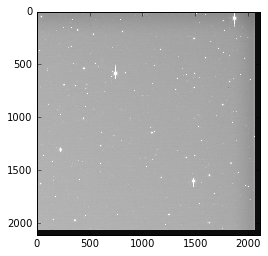

In [14]:
plt.imshow(rawmos,vmin=3e3,vmax=1e4,cmap='gray')

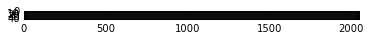

In [15]:
plt.imshow(rawmos[2066:2112,18:2065],vmin=3e3,vmax=1e4,cmap='gray')

(16.592028, 0.33405760208003216, 17.57809157038939)

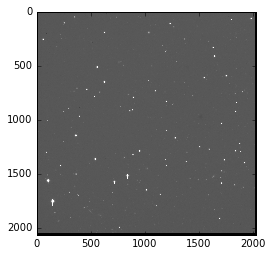

In [24]:
plt.imshow(rawbok,vmin=1e3,vmax=1e4,cmap='gray')


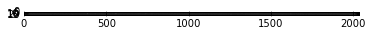

In [23]:
plt.imshow(rawbok[2017:2036,1:2048],vmin=3e3,vmax=1e4,cmap='gray')

In [27]:
# b=fitsio.FITS('/project/projectdirs/cosmo/staging/mosaicz/MZLS_Raw/20160225/k4m_160226_024444_ori.fits.fz')
braw=fitsio.FITS('/project/projectdirs/cosmo/staging/bok/BOK_Raw/20160202/ksb_160203_113130_ori.fits.fz')
rawbok=braw[1].read()
# for im,name in zip([rawmos,rawbok],['rawmos','rawbok']):
#     print "%s:" % name,im.min(),im.max(),np.median(im),np.std(im)

In [80]:
# BOK -- reverse axis of BIASEC
print braw[1].read_header()['BIASSEC']
data= rawbok[0:2048,0:2017] # Reverse xy of above for BOK
bias= rawbok[0:2048,2017:2036]
# finish 
hd=braw[0].read_header()
expt=hd['EXPTIME']
gain=1.5
(np.median(data)-np.median(bias))*gain/expt

[2017:2036,1:2048]


13.473684210526315

(13.473684210526315, 37.236842105263158)

'[2017:2036,1:2048]'

In [36]:
rawbok.min(),rawbok[rawbok < 60000].max()

(883, 59988)

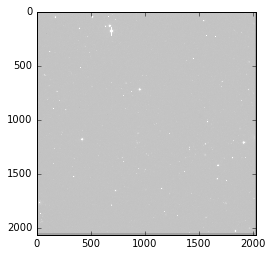

In [52]:
plt.imshow(np.log10(rawbok),vmin=2,vmax=3.5,cmap='gray')

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 19 x 2035)
  '(shape is %d x %d)' % inp.shape[::-1])


([array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  arra

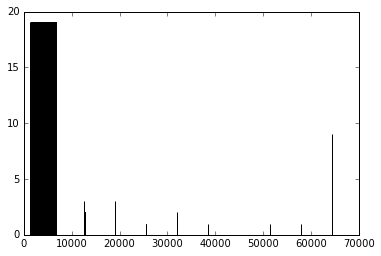

In [65]:
plt.hist(rawbok[2017:2036,1:2048])

([array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  2047.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 2047.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),


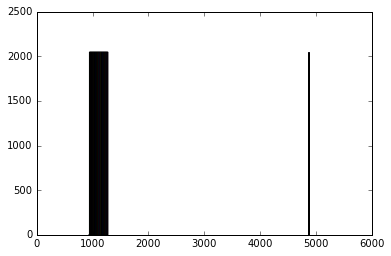

In [64]:
plt.hist(rawbok[1:2048,2017:2036])

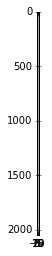

In [63]:
plt.imshow(np.log10(rawbok[1:2048,2017:2036]),vmin=2,vmax=3.5,cmap='gray')